In [94]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from mlxtend.evaluate import paired_ttest_5x2cv

In [95]:
#Reading the data as numpy arrays
df_sensor = np.load('xTrain.npy')
df_target = np.load('yTrain.npy')

In [96]:
#Converting the arrays into dataframe for better usability
df_sensor = pd.DataFrame(df_sensor)
print(df_sensor.head())
df_target = pd.DataFrame(df_target)
print('\n')
print(df_target.head())

        0         1    2    3    4    5    6    7      8      9    ...  \
0  1.256693  0.797258  0.0  0.0  0.0  0.0  0.0  0.0   0.00   0.00  ...   
1  1.926418  2.006193  0.0  0.0  0.0  0.0  0.0  0.0  13.25  13.25  ...   
2  1.442979  0.827370  0.0  0.0  0.0  0.0  0.0  0.0   0.00   0.00  ...   
3  1.450287  0.979962  0.0  0.0  0.0  0.0  0.0  0.0   0.00   0.00  ...   
4  1.421111  1.418763  0.0  0.0  0.0  0.0  0.0  0.0   0.00   0.00  ...   

        93         94         95         96         97    98         99   100  \
0  1.500000  18.250000  21.083333  21.083333   6.666667  0.00   0.000000  0.0   
1  2.333333  21.000000  21.083333  21.000000  12.083333  0.00   0.000000  0.0   
2  0.000000   0.000000   0.000000   0.000000   0.000000  0.00  21.166667  0.0   
3  0.000000   5.333333  21.083333   0.000000   0.000000  0.00   0.000000  0.0   
4  0.000000   0.000000   0.000000   0.000000  21.250000  1.75   0.000000  0.0   

   101       102  
0  0.0  49.46263  
1  0.0  52.71255  
2  0.0  53.

In [97]:
#Printing the shape of the data
print(df_sensor.shape)
print(df_target.shape)

(208, 103)
(208, 1)


In [98]:
#Getting a better idea pf the dataset
df_sensor.describe()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
count,208.000000,208.000000,208.0,208.0,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,1.509916,1.270963,0.0,0.0,0.101362,0.250801,1.200321,2.801683,3.913061,2.364984,...,1.727965,5.084936,9.312500,10.412260,9.318109,5.984375,3.037660,0.988381,0.163462,73.473799
std,0.298570,0.733810,0.0,0.0,1.461866,1.841659,4.050689,6.186988,7.574382,5.893675,...,5.448203,8.224021,9.520592,9.263477,9.517829,8.587801,6.659722,3.792123,1.309823,18.964010
min,1.000288,0.004605,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.570860
25%,1.227019,0.661545,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.835503
50%,1.508362,1.299415,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.708333,10.500000,5.666667,0.000000,0.000000,0.000000,0.000000,76.159440
75%,1.763657,1.908589,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,9.354167,21.000000,21.000000,21.000000,14.166667,0.000000,0.000000,0.000000,88.843182
max,1.997426,2.489242,0.0,0.0,21.083333,18.500000,21.250000,21.250000,21.250000,21.250000,...,21.250000,21.250000,21.250000,21.250000,21.250000,21.250000,21.250000,21.250000,16.583333,107.266800


In [99]:
#Getting a better sense of the target variables
df_target.describe()

,0
count,208.000000
mean,118.637261
std,27.214478
min,62.798693
25%,96.579845
50%,115.910036
75%,136.031713
max,203.997147


In [100]:
#Checking  if there are any null values or not in the sensor data
print(df_sensor.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
98     0
99     0
100    0
101    0
102    0
Length: 103, dtype: int64


In [101]:
#Checking  if there are any null values or not in the sensor data
print(df_target.isnull().sum())

0    0
dtype: int64


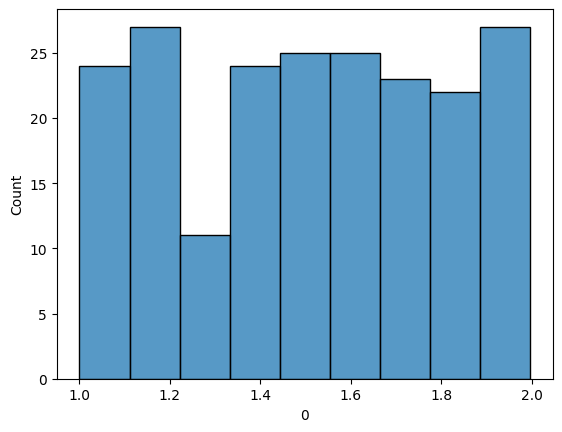

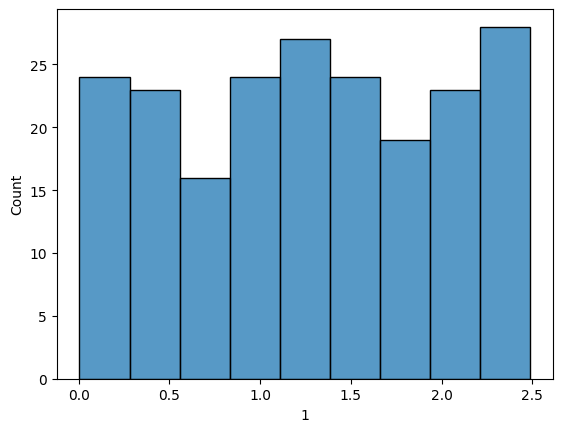

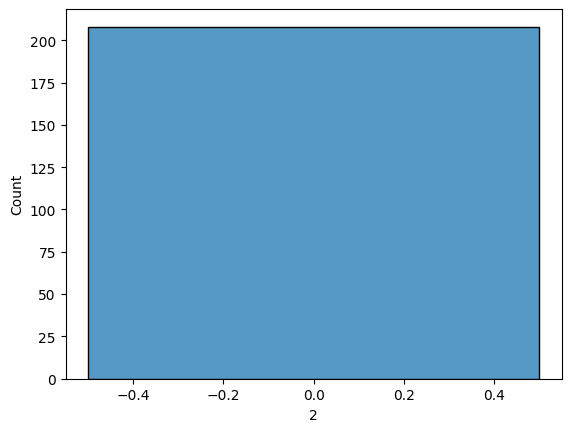

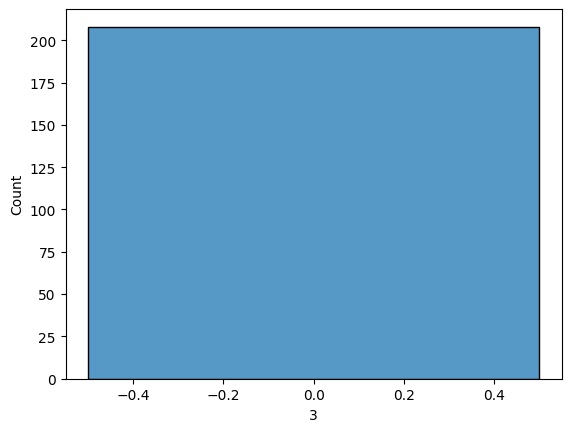

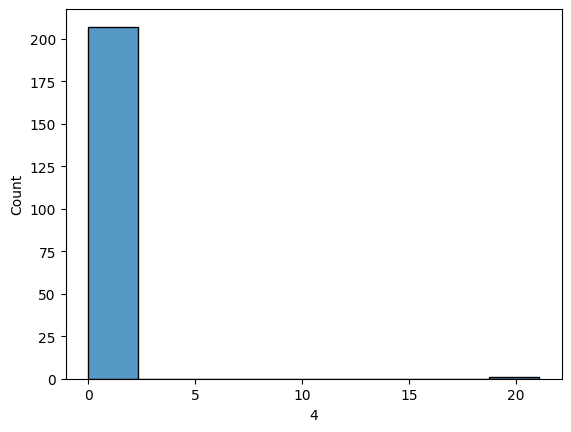

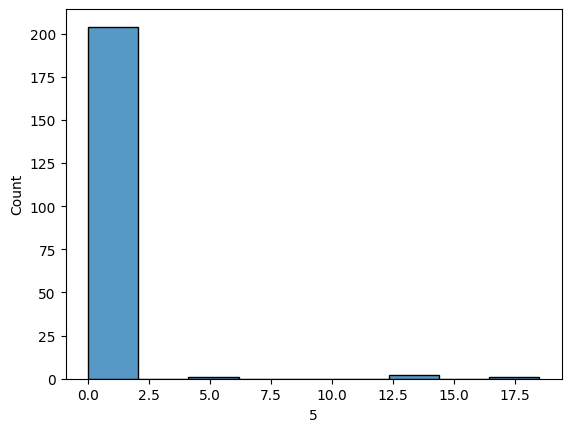

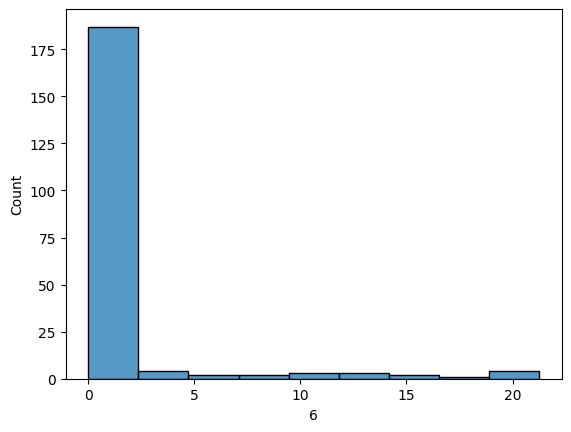

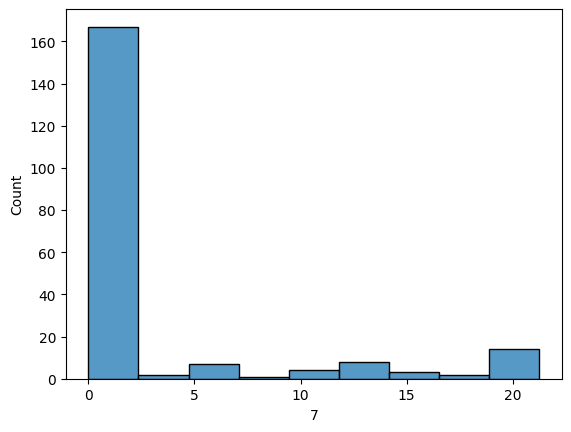

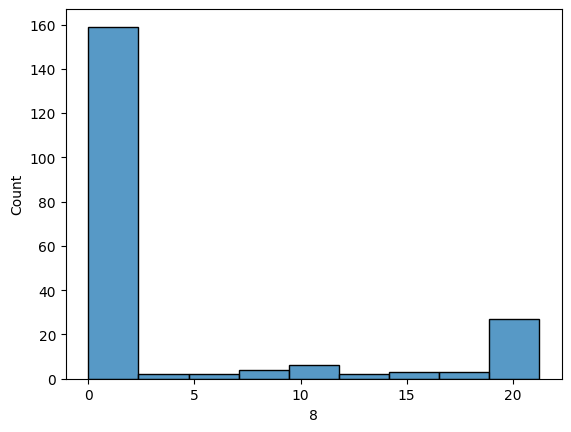

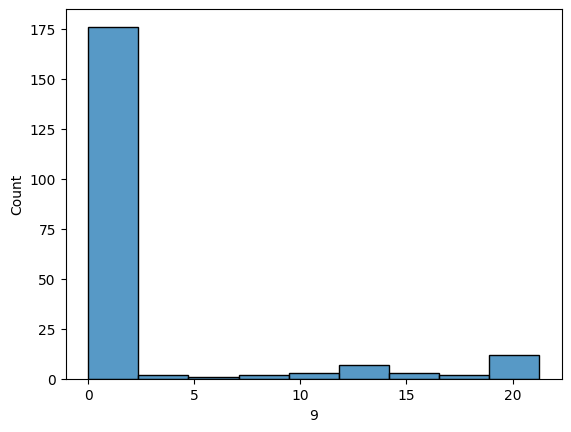

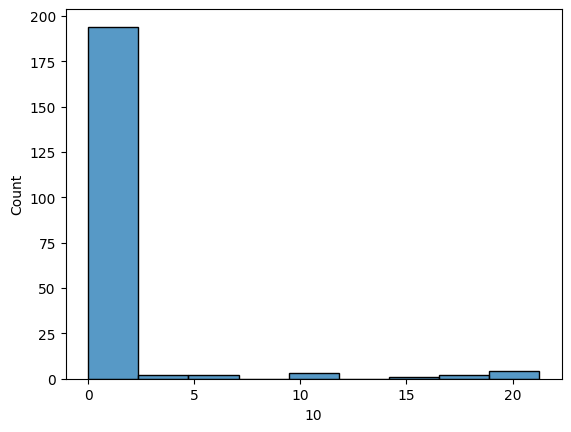

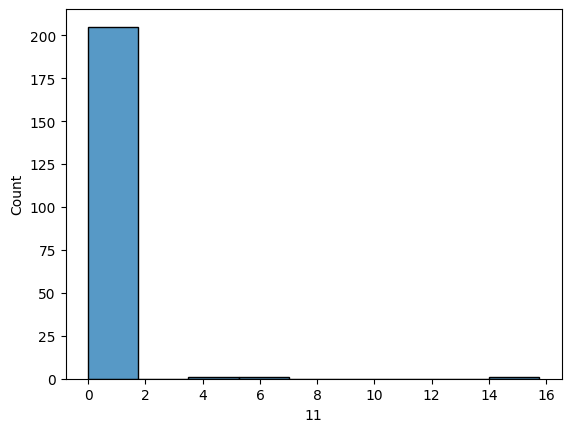

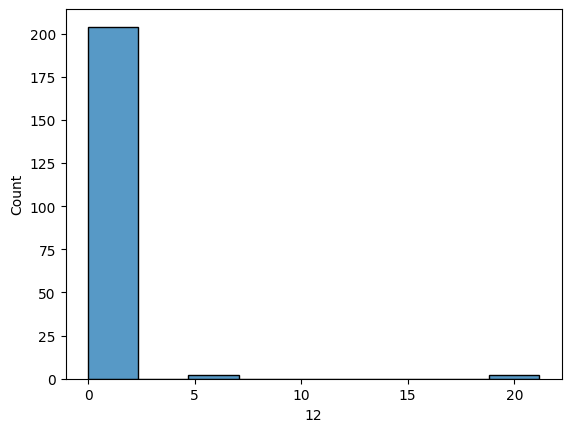

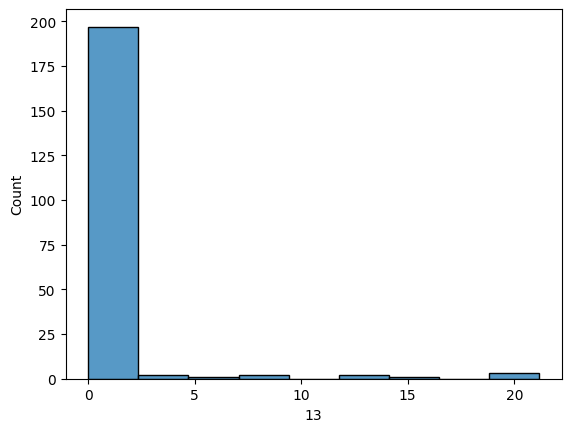

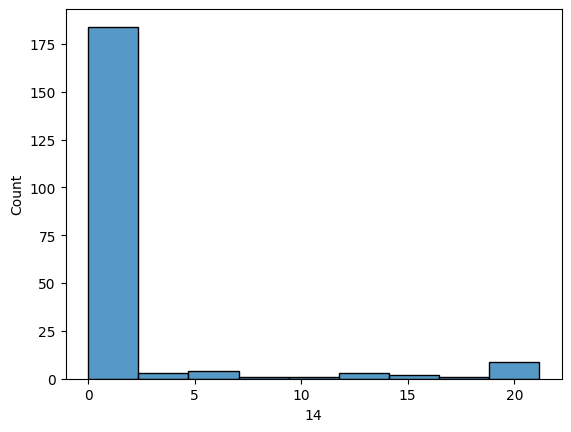

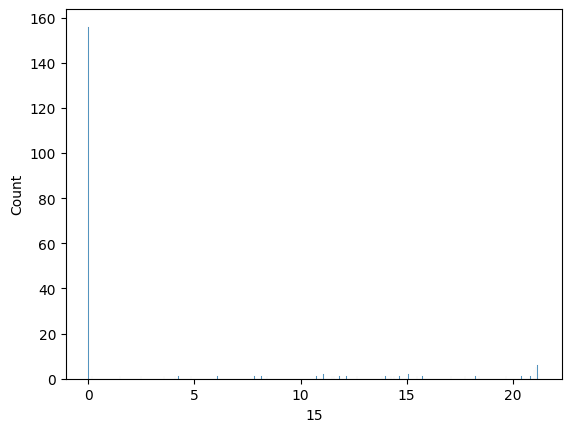

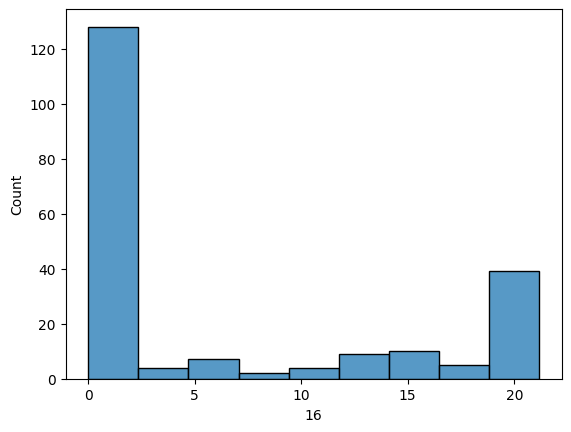

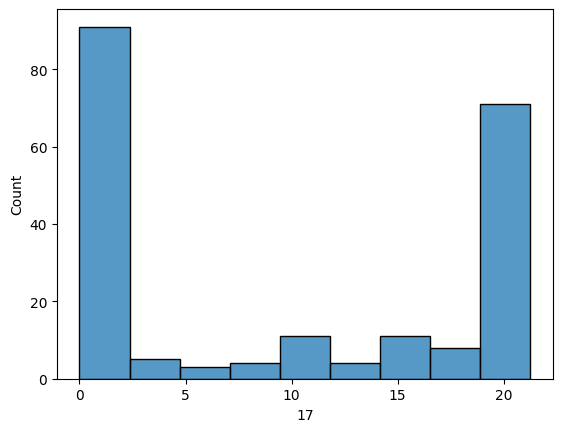

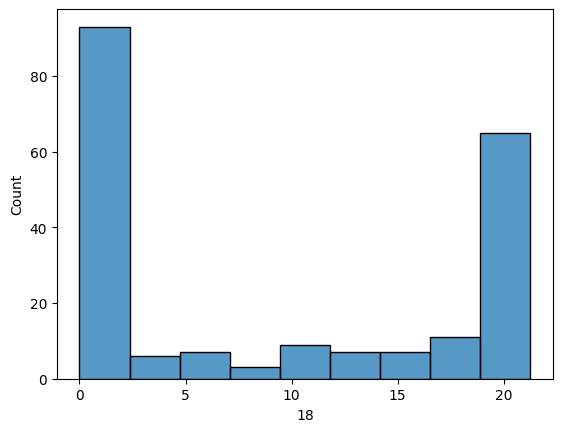

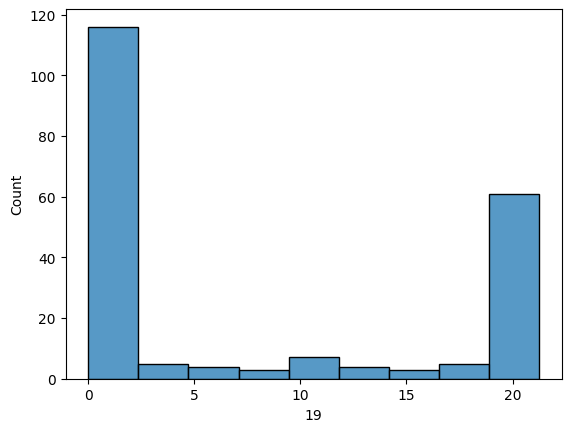

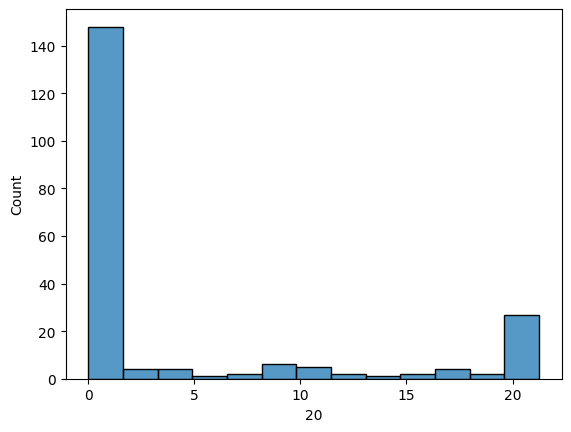

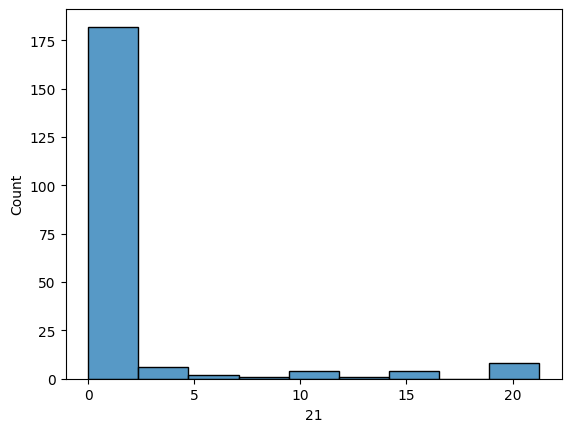

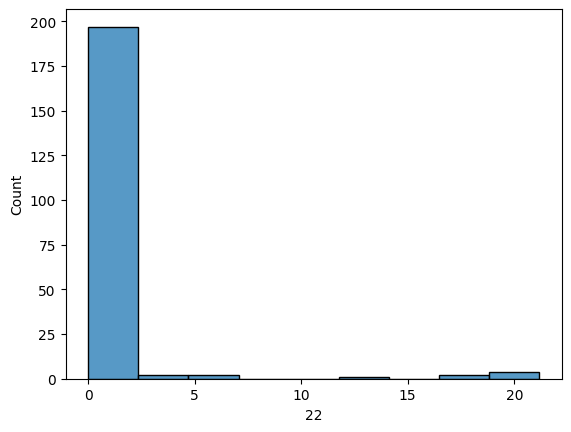

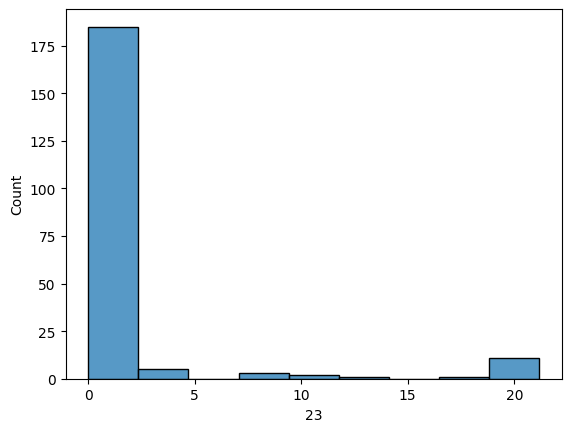

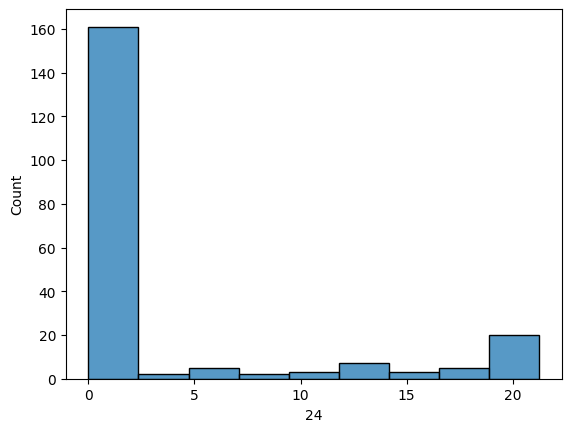

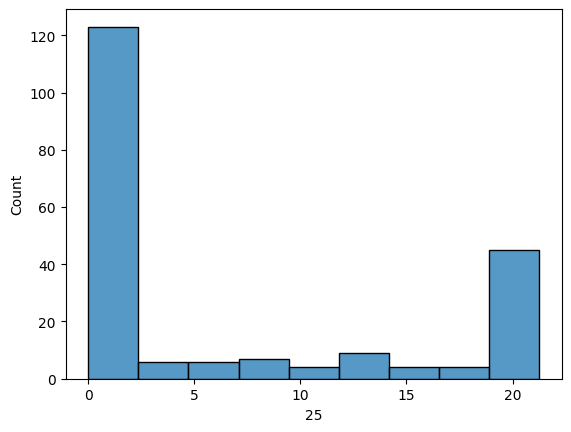

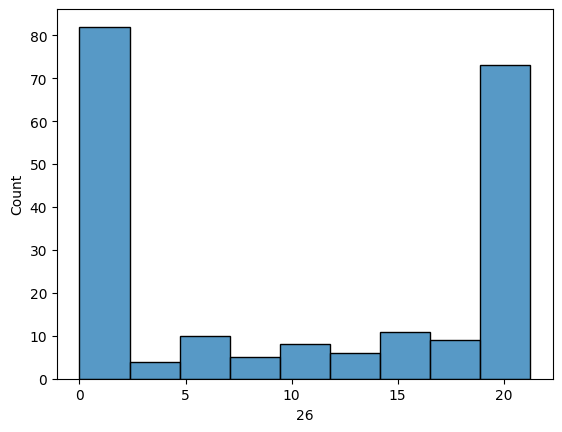

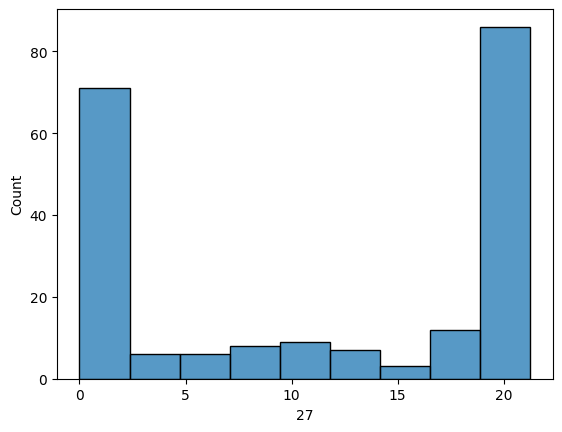

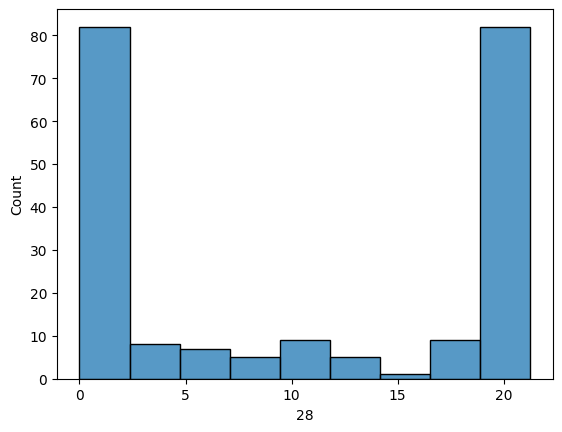

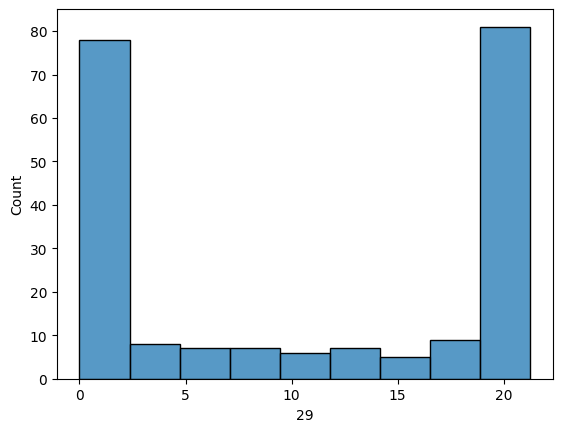

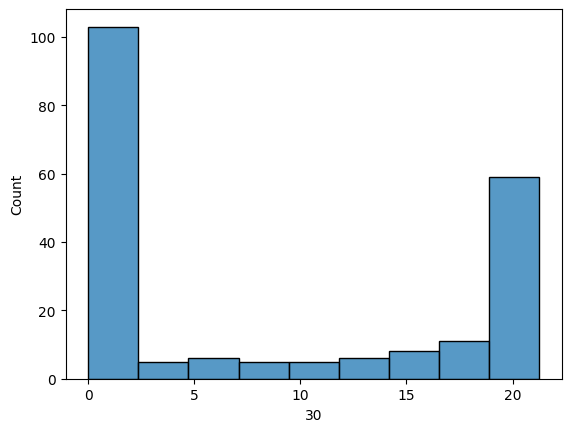

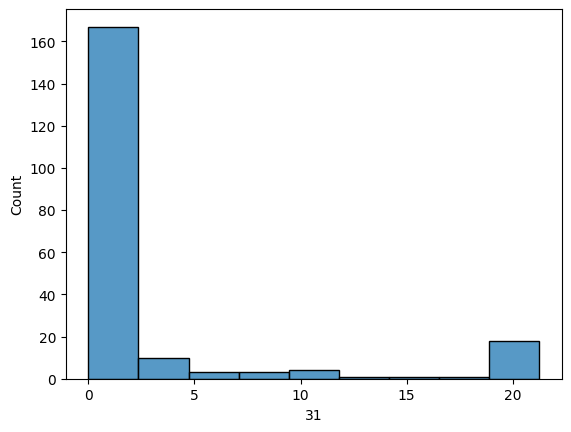

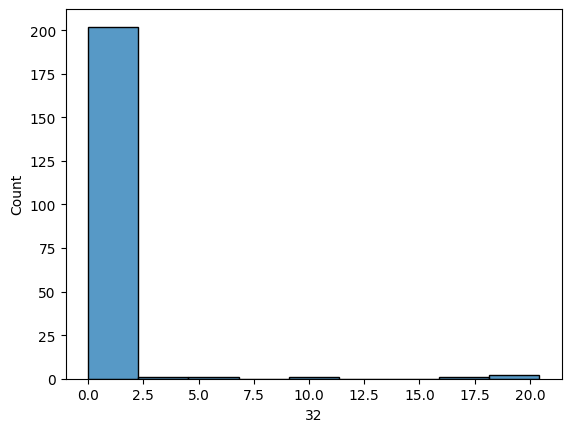

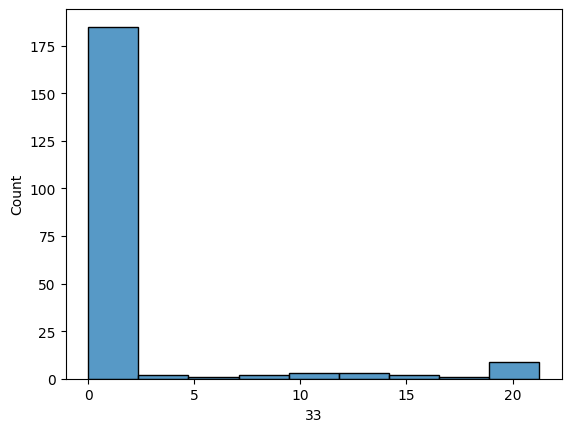

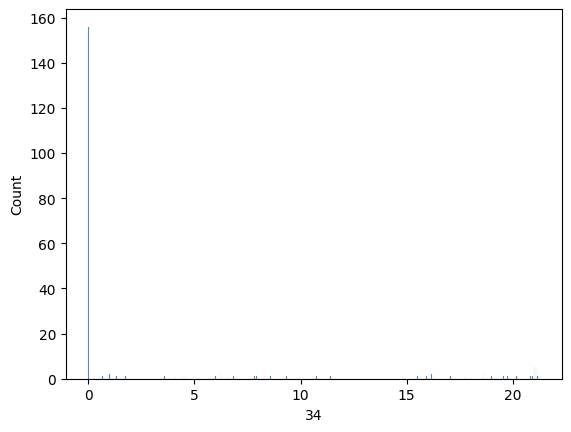

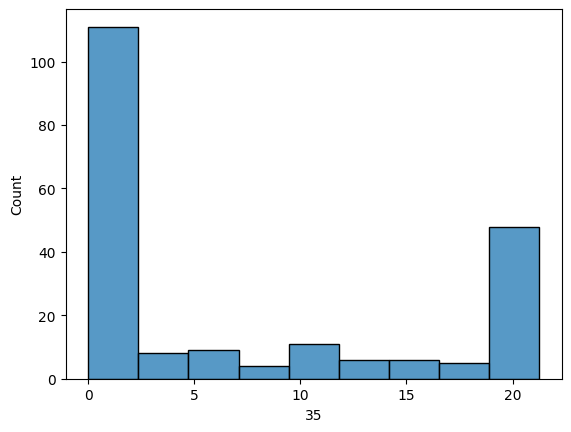

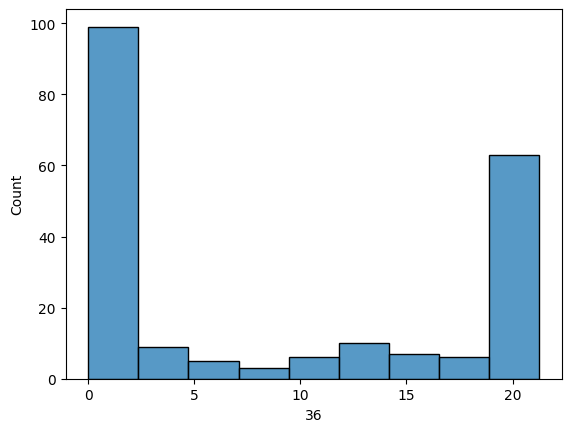

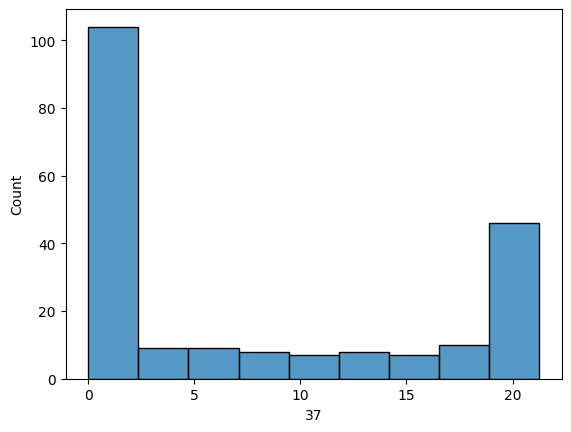

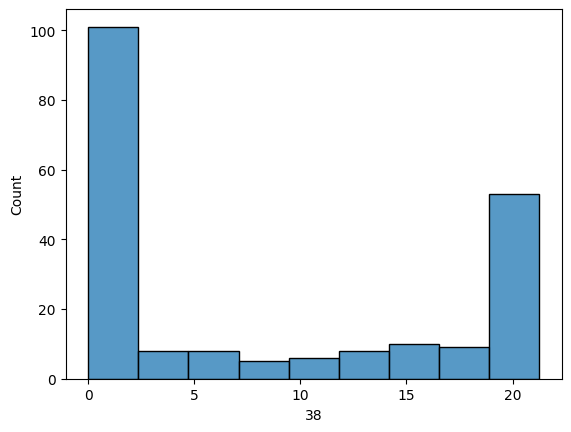

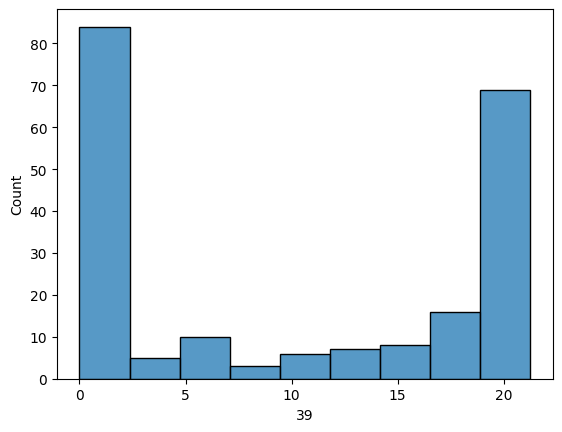

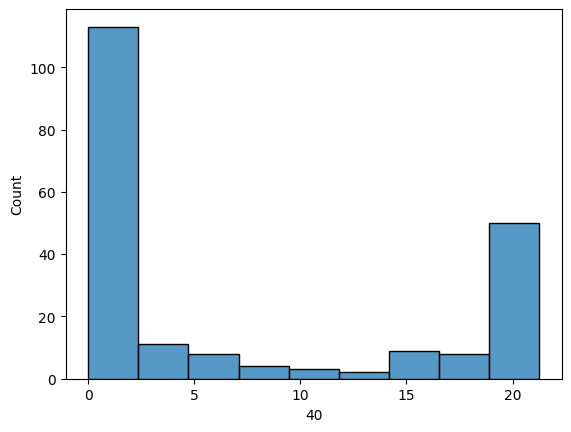

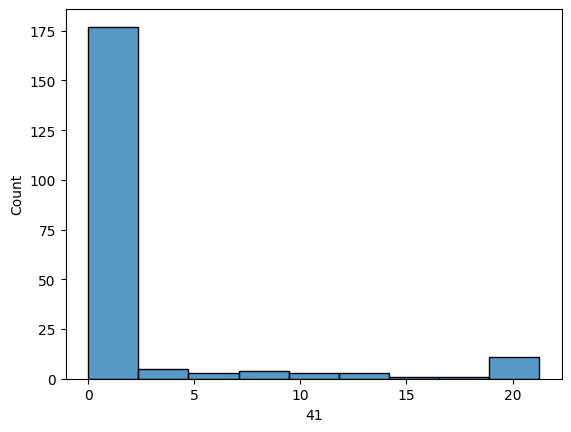

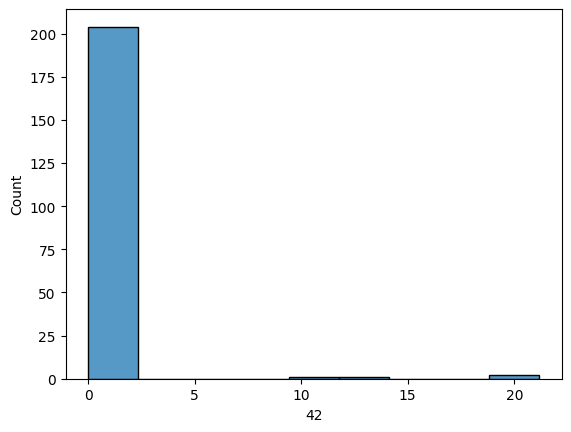

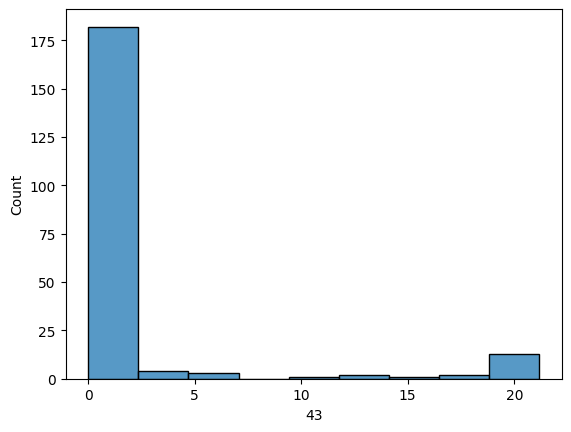

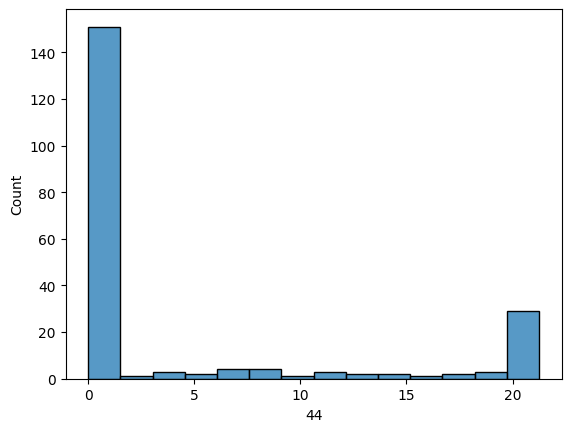

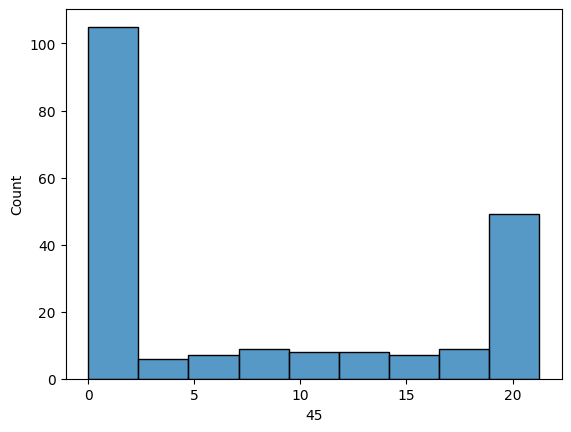

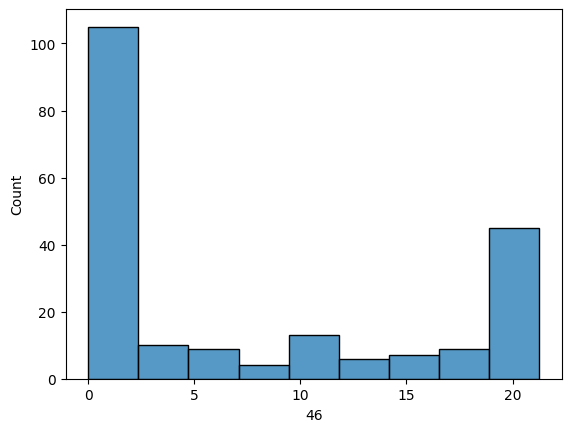

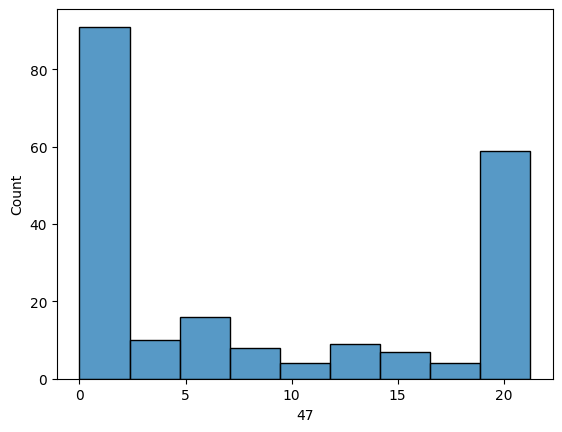

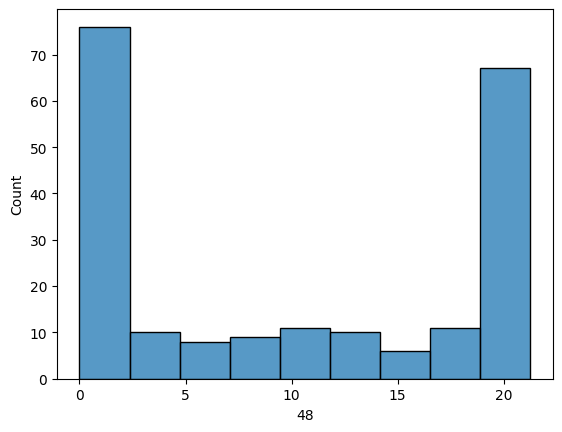

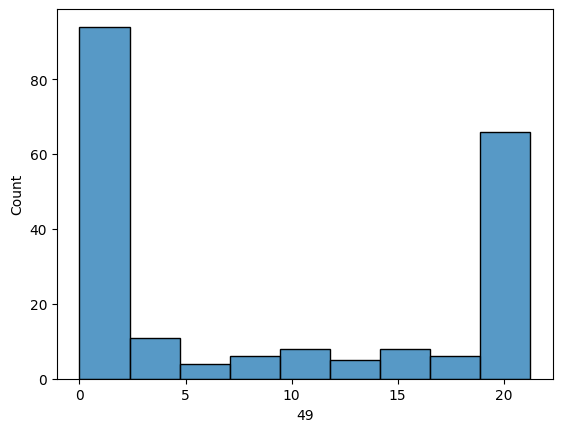

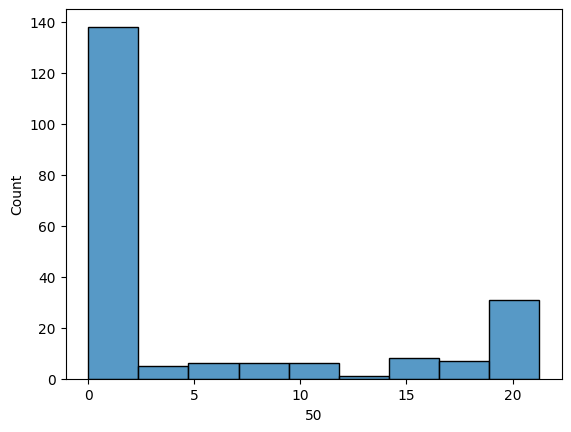

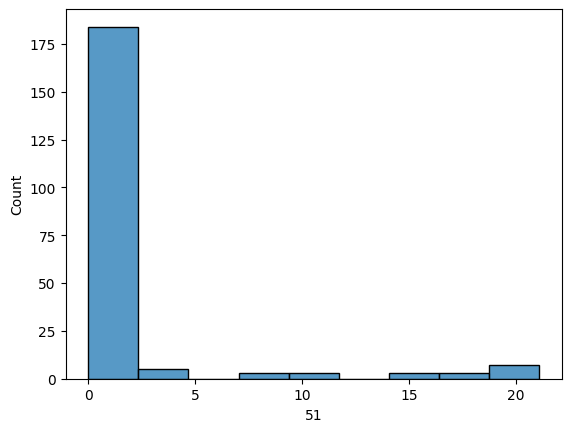

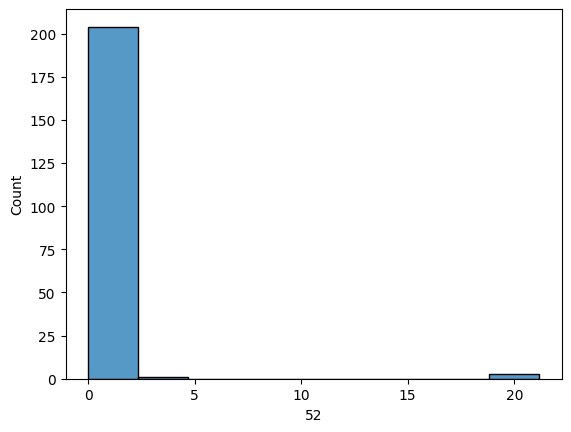

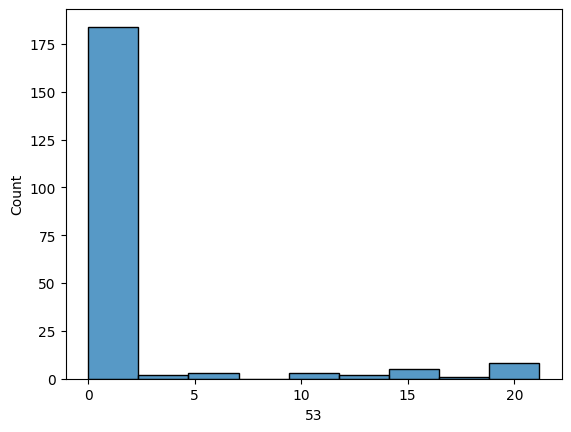

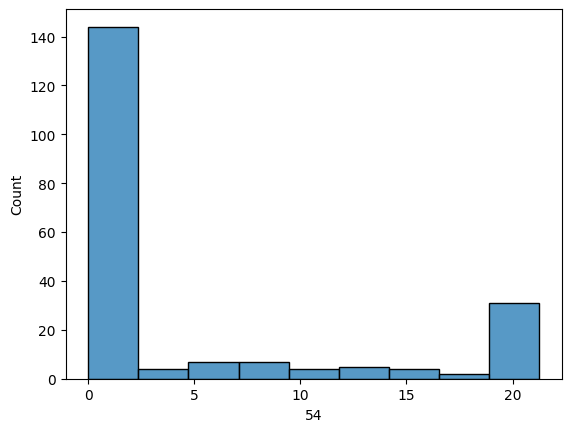

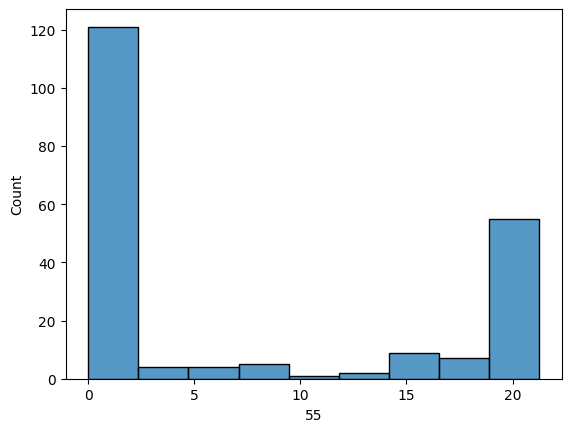

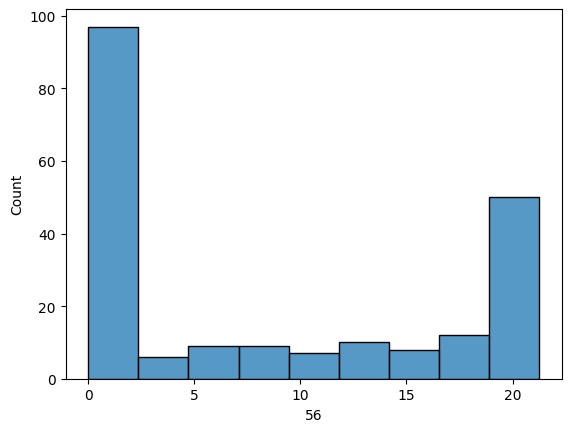

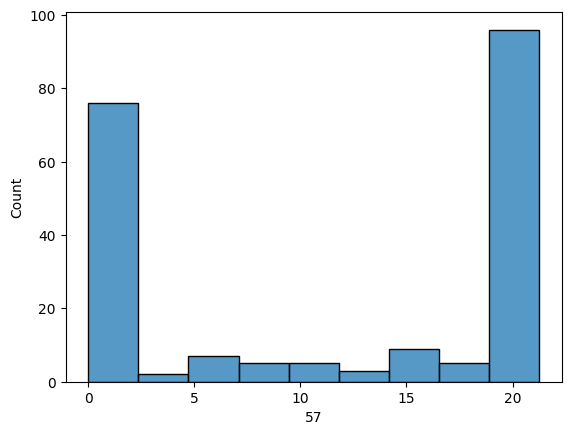

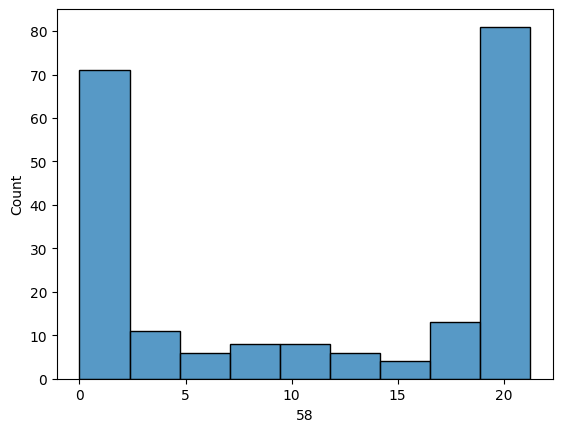

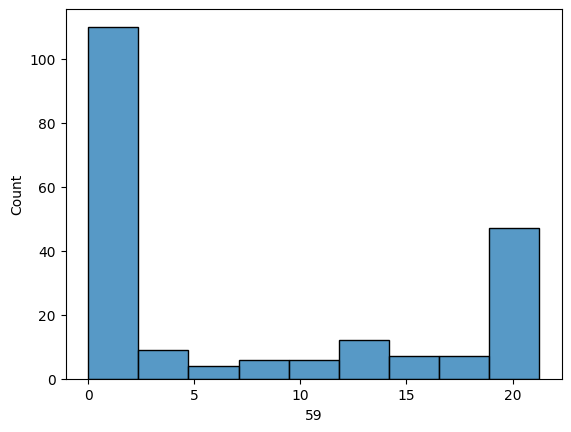

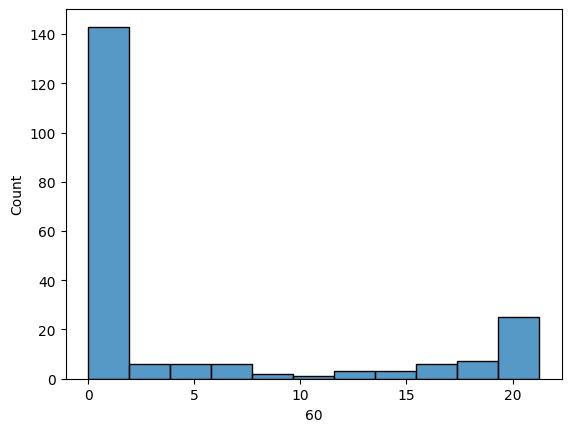

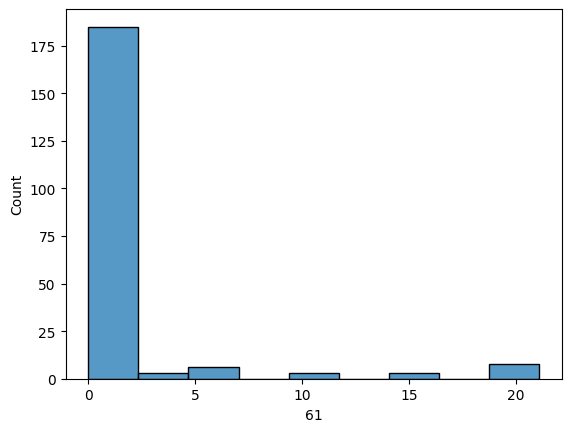

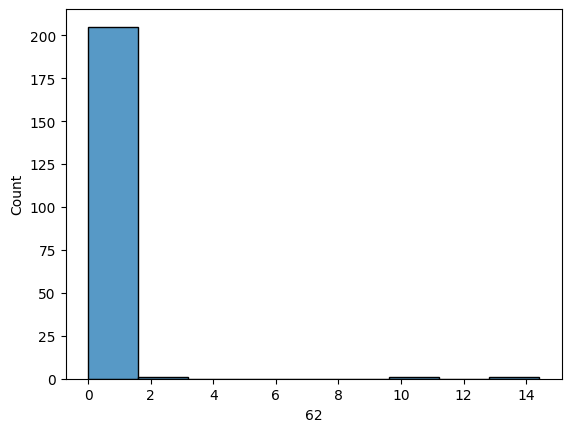

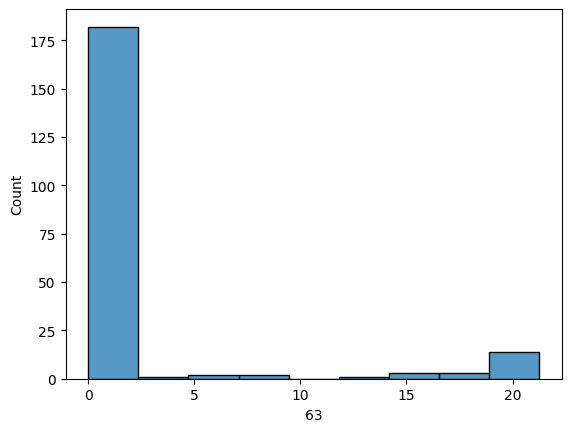

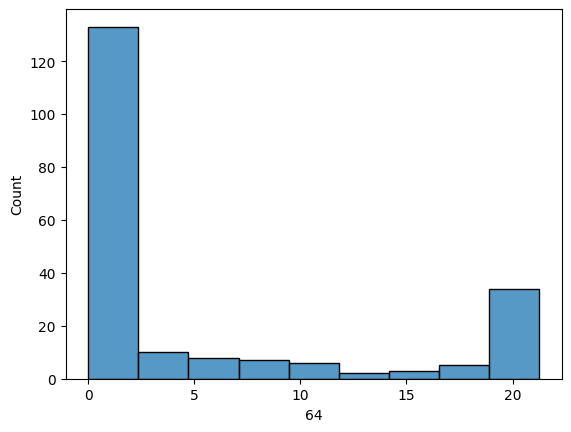

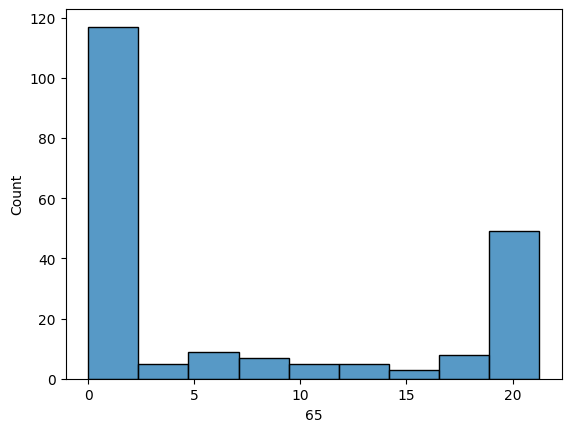

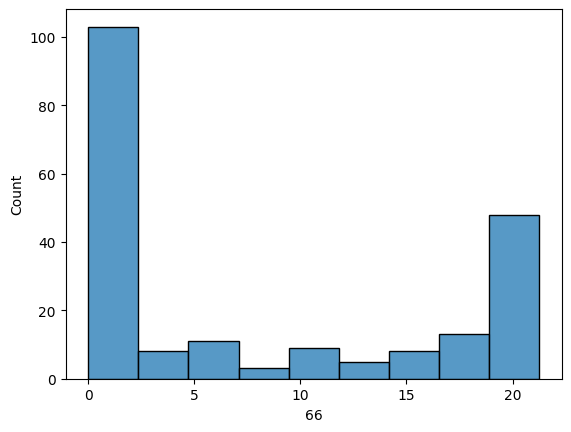

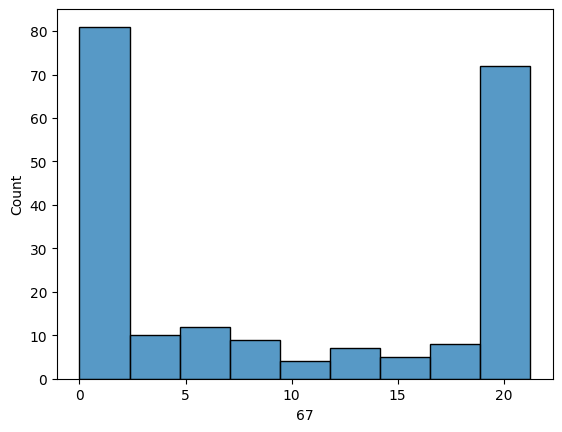

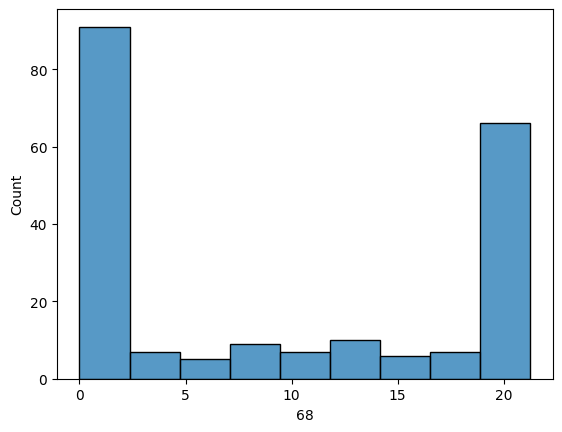

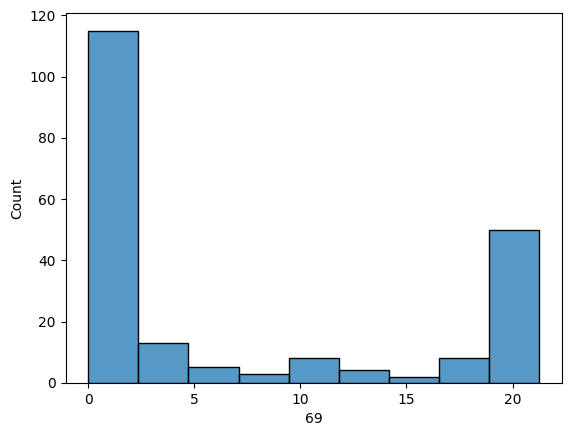

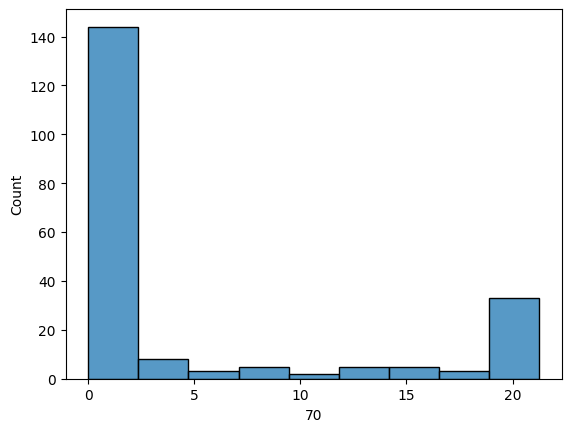

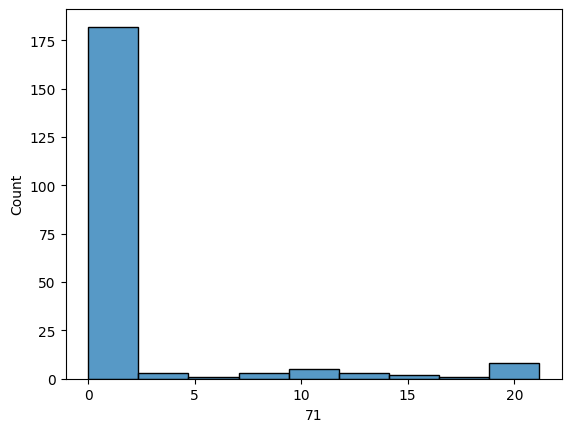

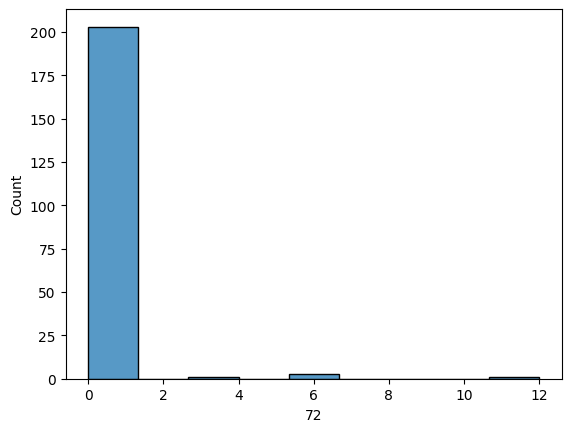

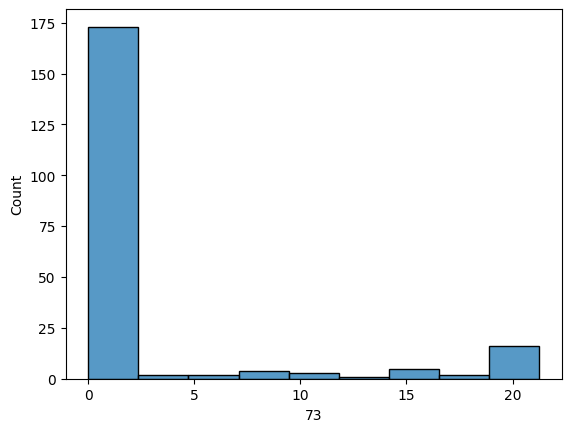

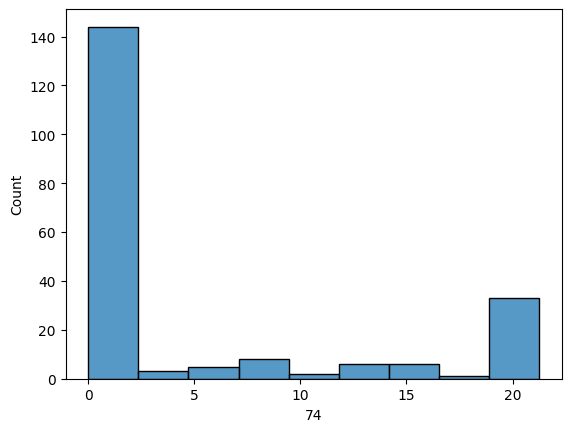

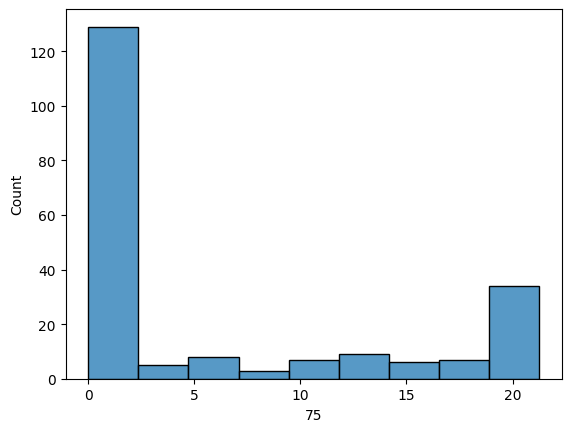

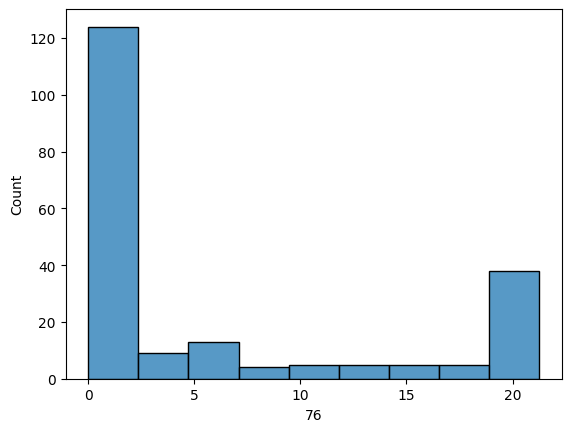

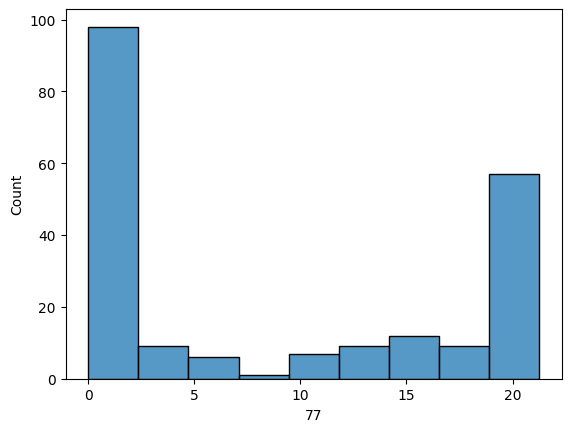

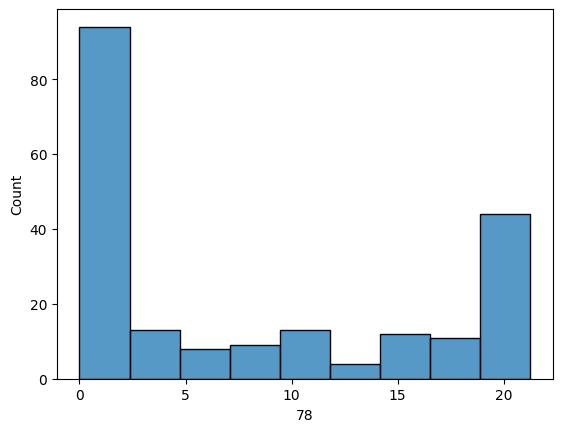

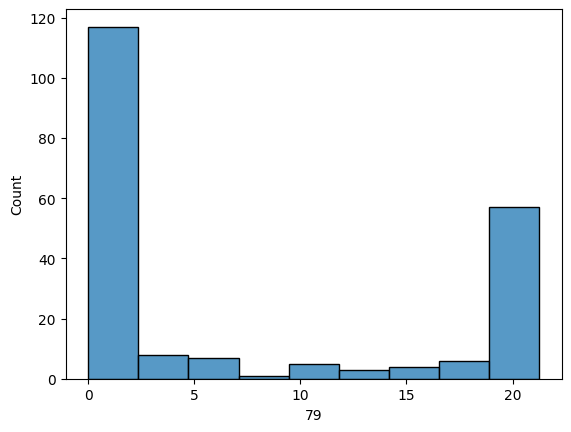

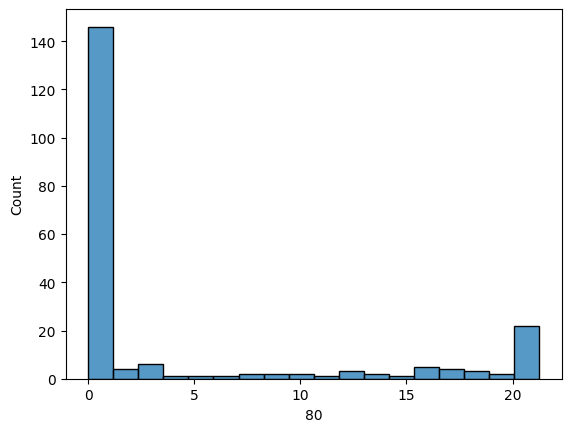

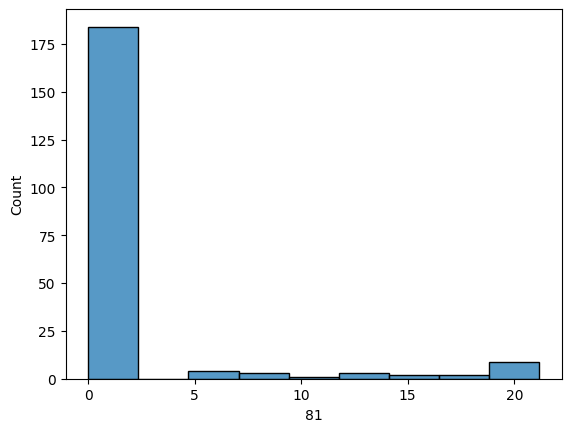

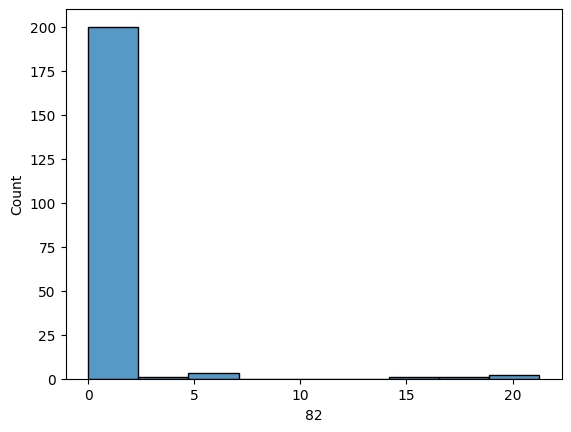

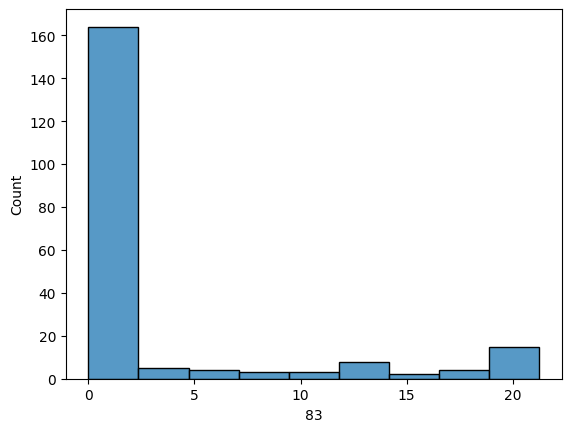

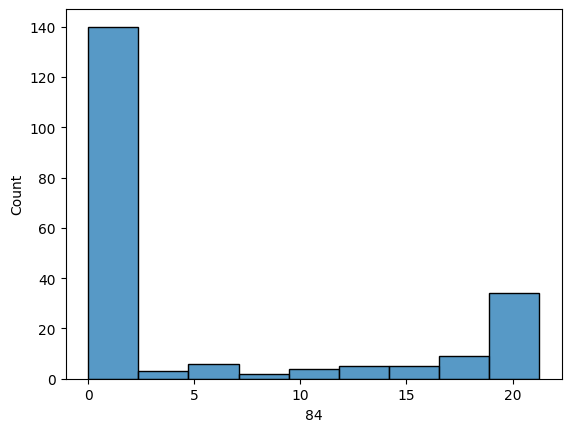

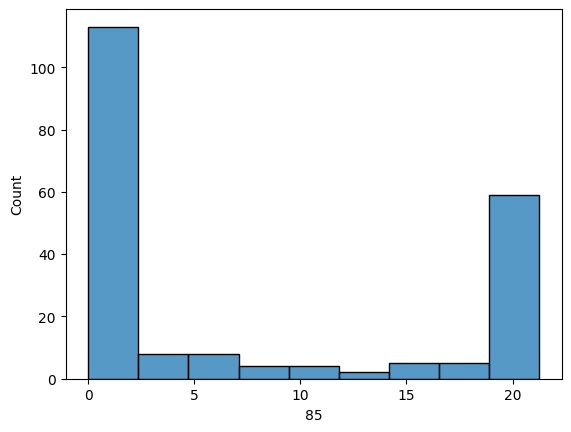

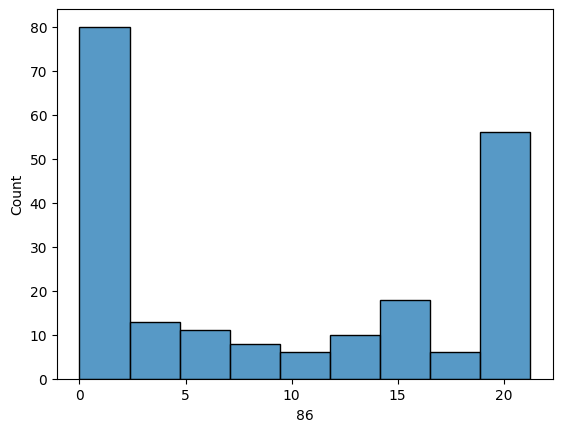

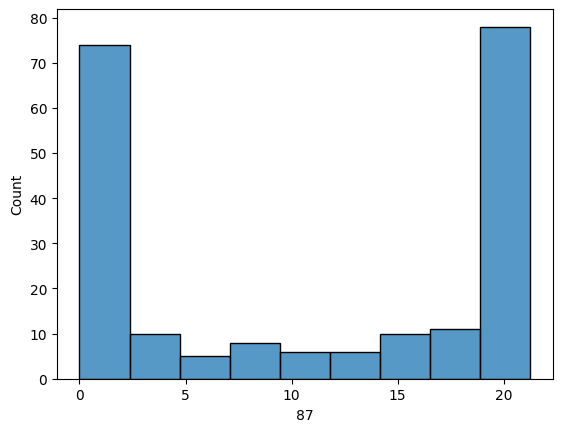

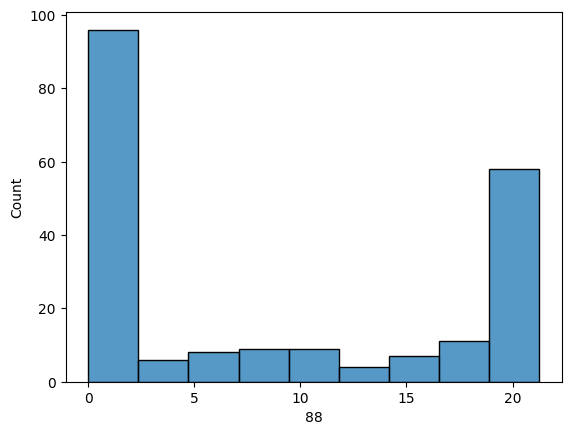

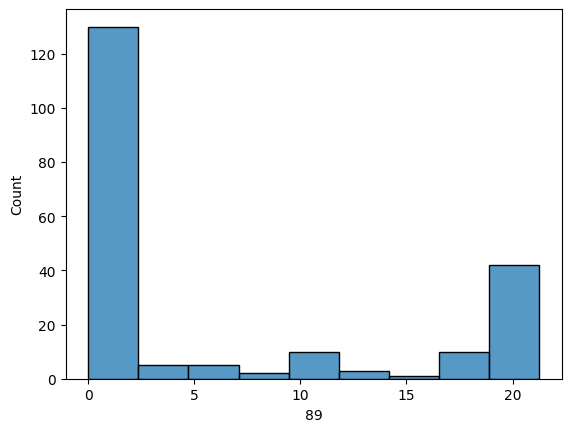

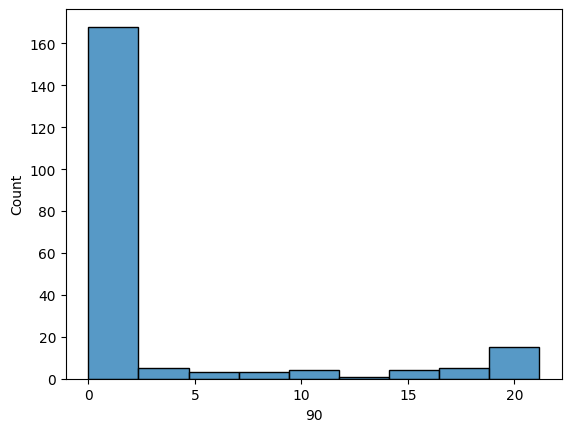

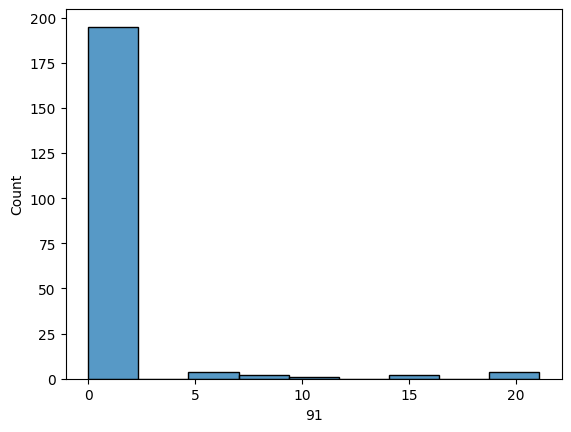

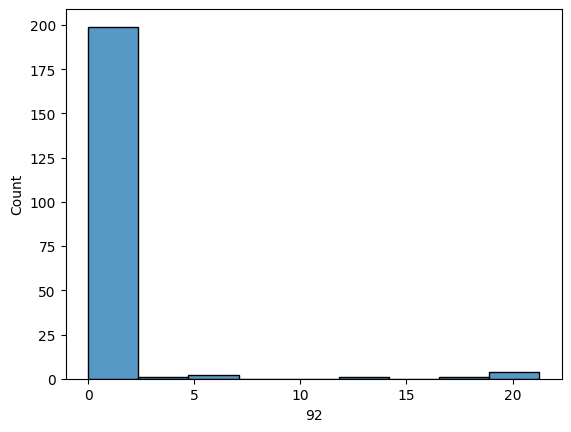

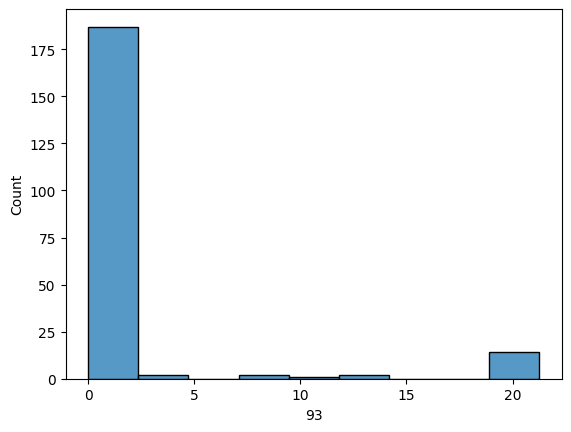

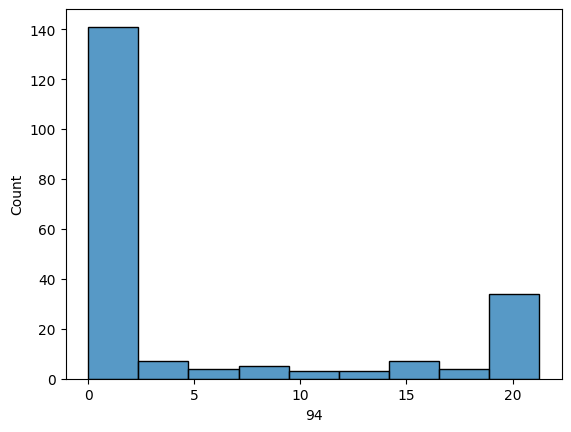

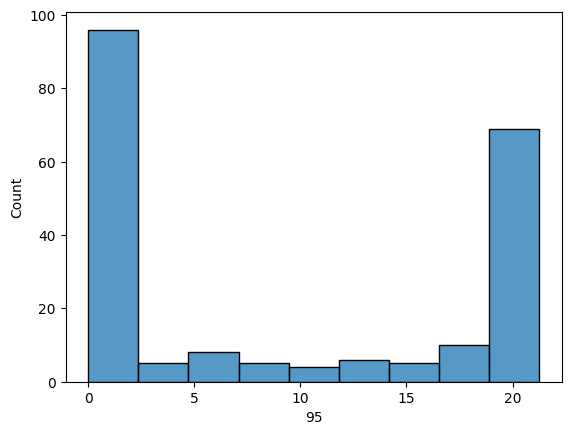

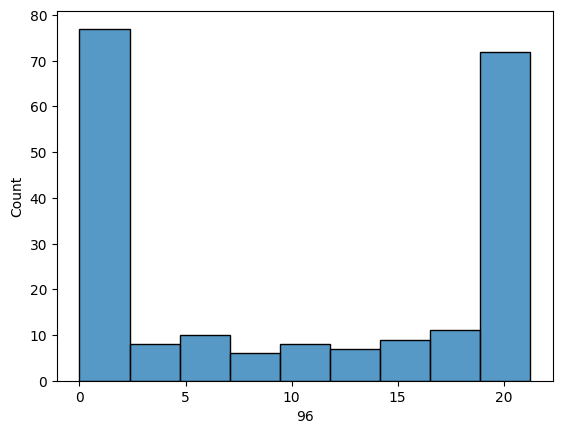

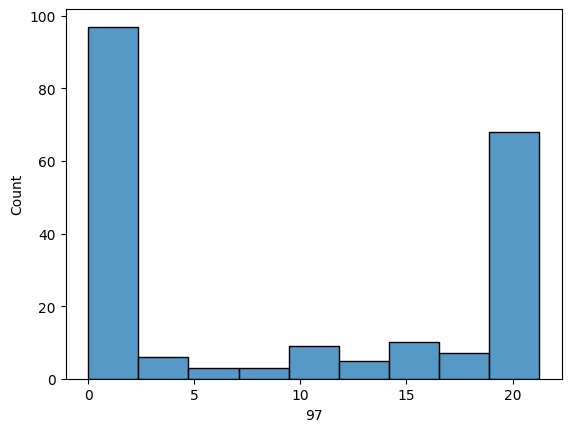

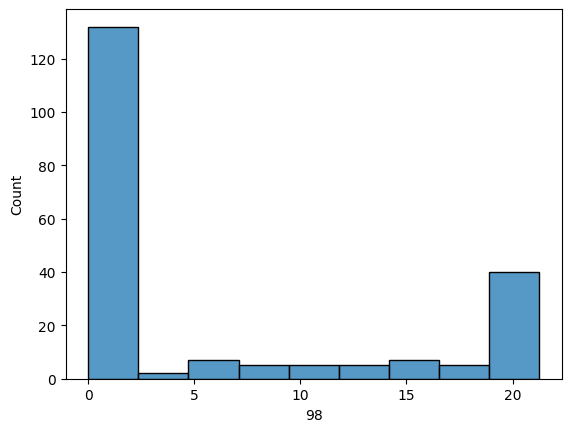

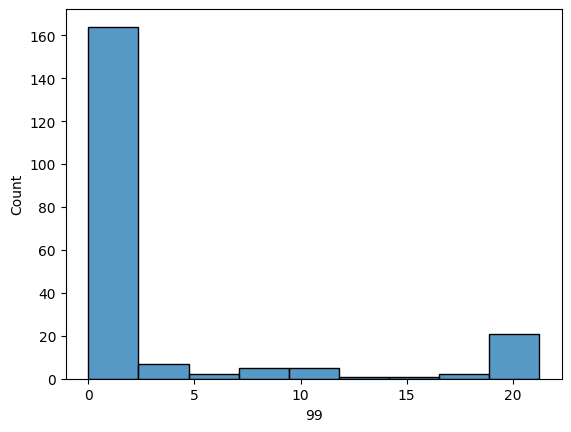

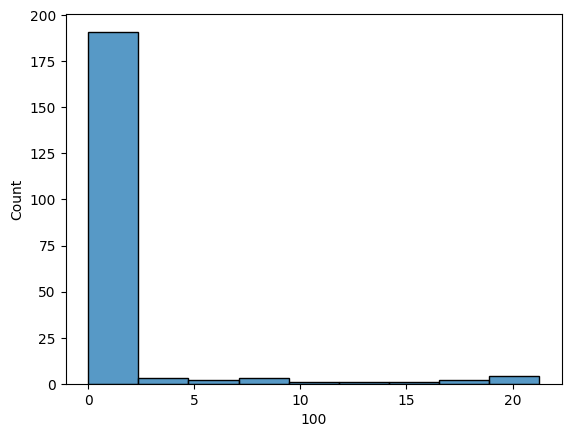

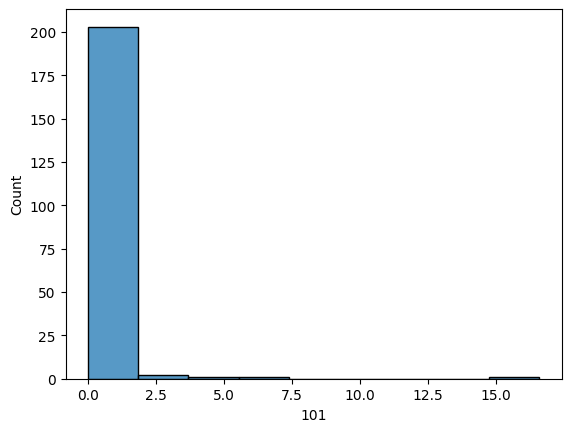

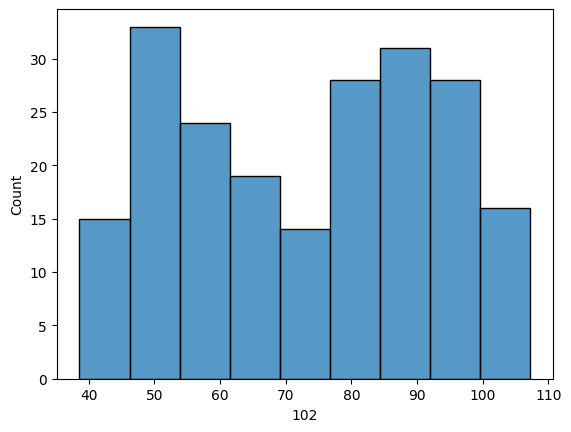

In [102]:
# Examinig the distribution of values in each sensor
for col in df_sensor.columns:
  sns.histplot(df_sensor, x=col)
  plt.xlabel(col)
  plt.show()

In [103]:
#From the plot is seen that the values are majority either 1 or 20 and there are some values that are in between this range
#Thus performing normalization to bring all the datapoints in a single range
#for easy learning of the models 
scaler = StandardScaler()
X = scaler.fit_transform(df_sensor)

In [104]:
#Converting the standardize data to dataframe
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,-0.850166,-0.647100,0.0,0.0,-0.069505,-0.136511,-0.297040,-0.453927,-0.517864,-0.402243,...,-0.041943,1.604668,1.239338,1.154730,-0.279248,-0.698527,-0.457225,-0.261269,-0.125098,-1.269199
1,1.398357,1.004353,0.0,0.0,-0.069505,-0.136511,-0.297040,-0.453927,1.235674,1.851354,...,0.111382,1.939861,1.239338,1.145713,0.291232,-0.698527,-0.457225,-0.261269,-0.125098,-1.097412
2,-0.224730,-0.605965,0.0,0.0,-0.069505,-0.136511,-0.297040,-0.453927,-0.517864,-0.402243,...,-0.317927,-0.619795,-0.980503,-1.126724,-0.981378,-0.698527,2.728754,-0.261269,-0.125098,-1.058156
3,-0.200196,-0.397518,0.0,0.0,-0.069505,-0.136511,-0.297040,-0.453927,-0.517864,-0.402243,...,-0.317927,0.030277,1.239338,-1.126724,-0.981378,-0.698527,-0.457225,-0.261269,-0.125098,-1.085881
4,-0.298150,0.201901,0.0,0.0,-0.069505,-0.136511,-0.297040,-0.453927,-0.517864,-0.402243,...,-0.317927,-0.619795,-0.980503,-1.126724,1.256660,-0.494258,-0.457225,-0.261269,-0.125098,-1.168046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1.031536,-1.538334,0.0,0.0,-0.069505,-0.136511,-0.297040,-0.453927,-0.517864,-0.402243,...,3.576518,1.015541,0.809408,0.983396,1.247884,0.527087,-0.457225,-0.261269,-0.125098,1.449914
204,-0.510865,0.034445,0.0,0.0,-0.069505,-0.136511,-0.255795,2.975485,-0.517864,-0.402243,...,-0.317927,-0.619795,-0.980503,-1.126724,-0.981378,-0.698527,-0.457225,-0.261269,-0.125098,1.704941
205,-1.094444,1.005893,0.0,0.0,-0.069505,-0.136511,-0.297040,-0.453927,-0.517864,1.851354,...,-0.317927,1.929704,1.125275,-1.126724,-0.981378,-0.698527,-0.457225,-0.261269,-0.125098,1.616868
206,-0.693689,0.183138,0.0,0.0,-0.069505,-0.136511,-0.297040,-0.453927,-0.517864,-0.402243,...,1.552633,1.950019,1.230564,0.397252,0.501871,1.762429,2.703667,0.575809,-0.125098,1.751525


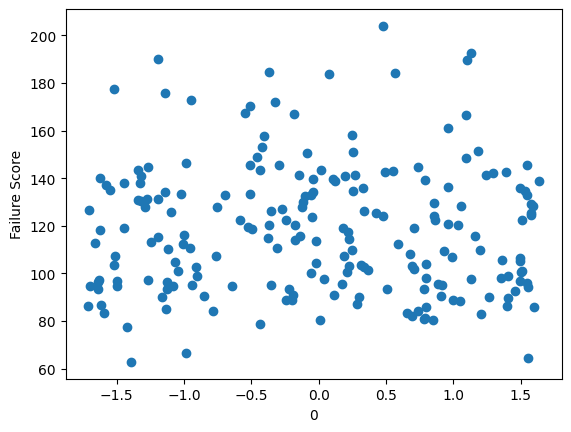

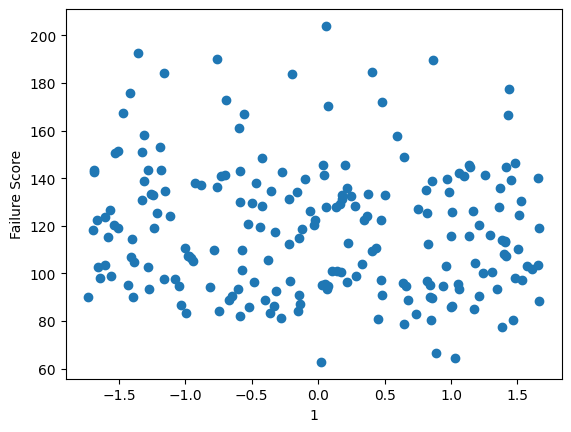

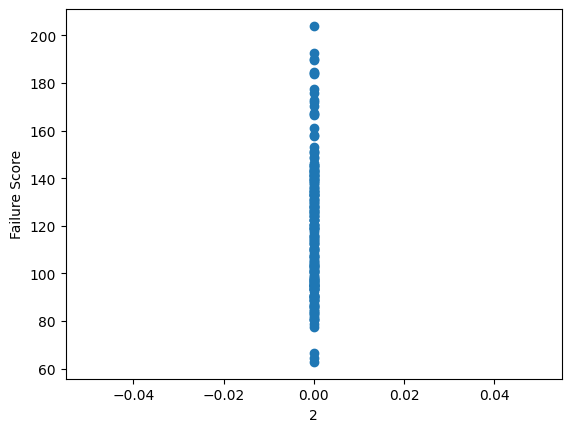

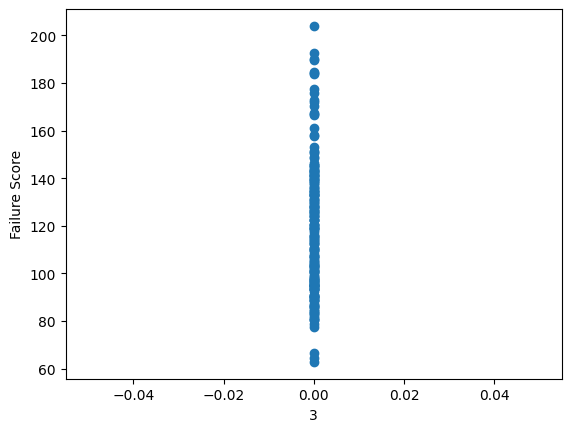

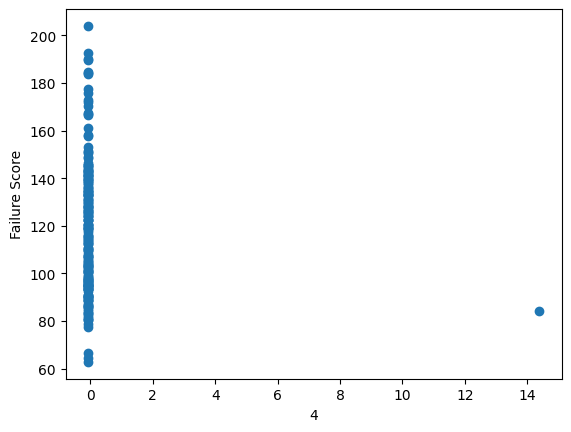

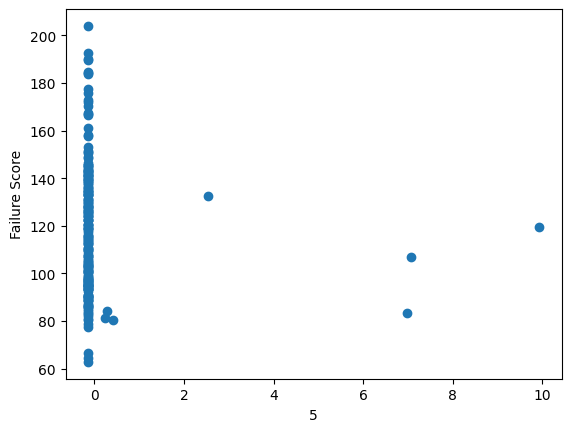

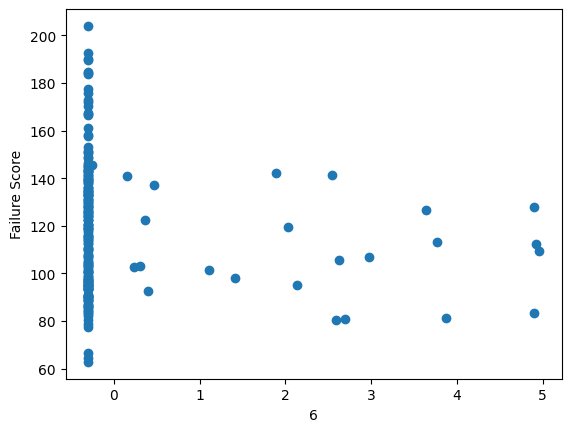

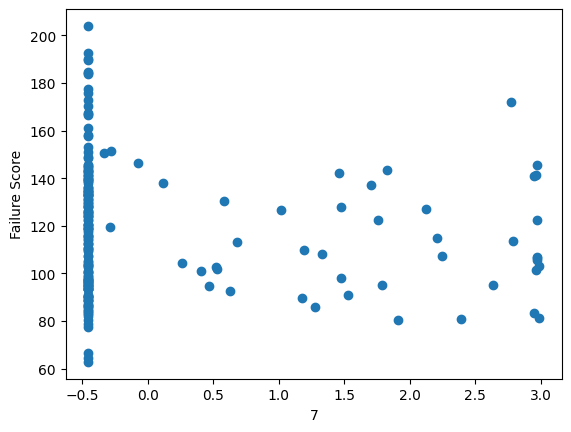

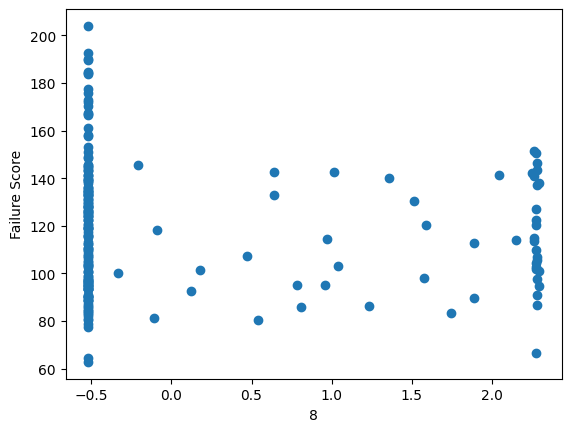

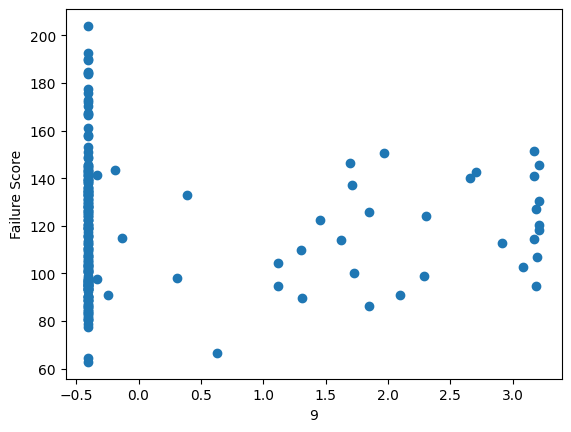

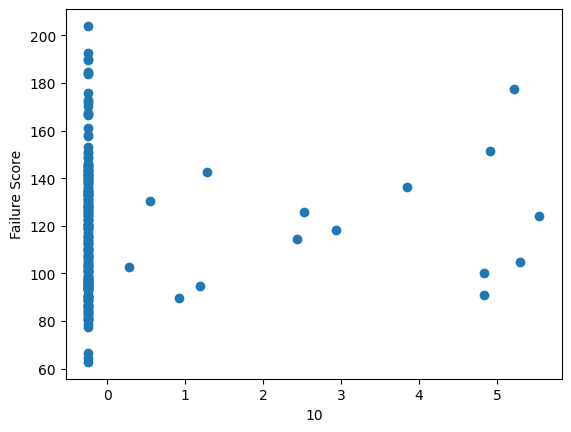

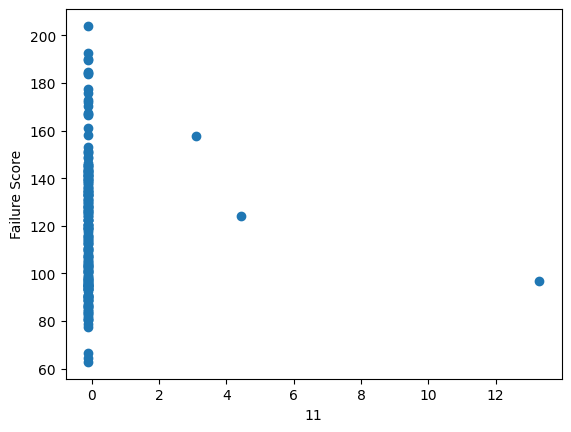

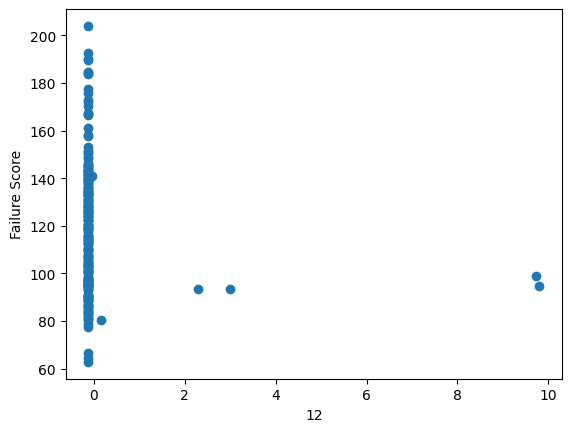

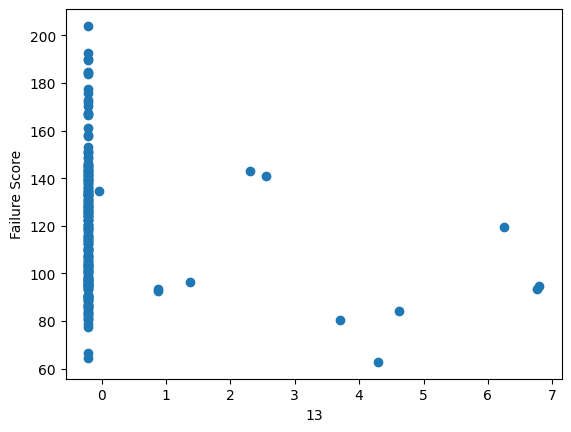

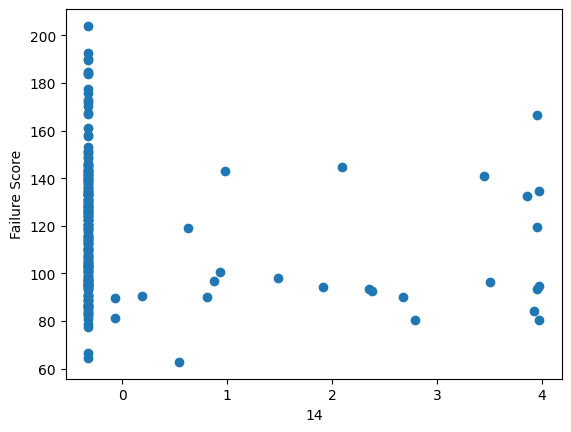

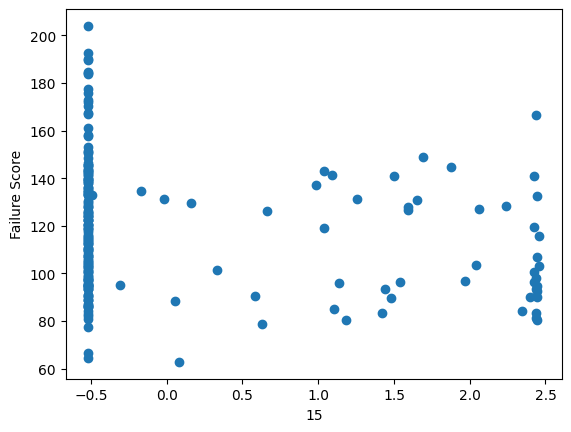

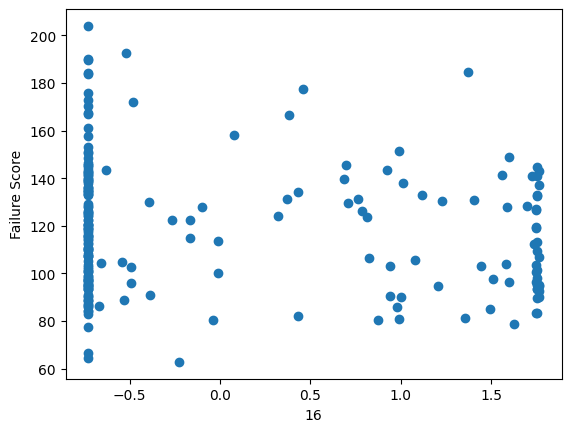

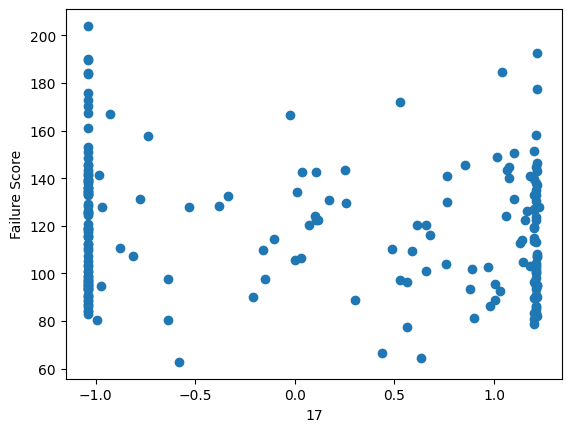

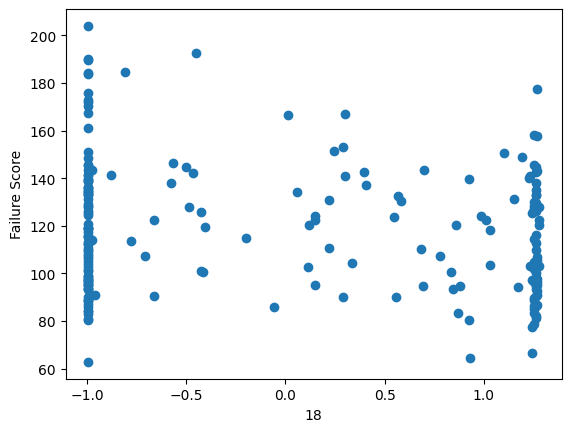

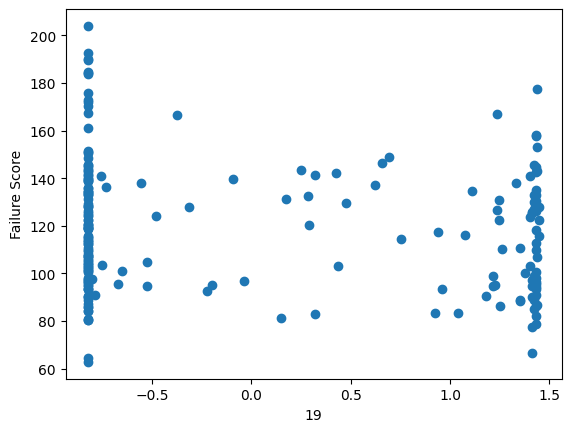

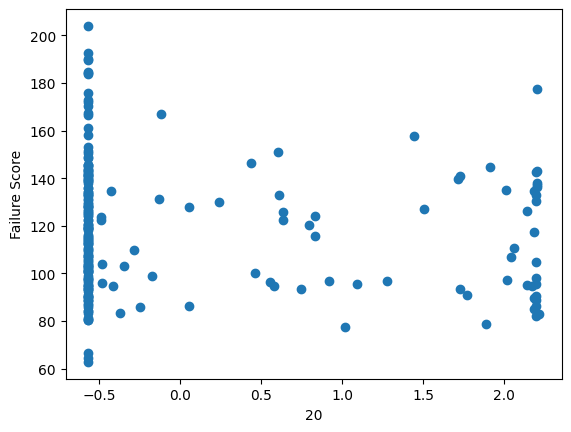

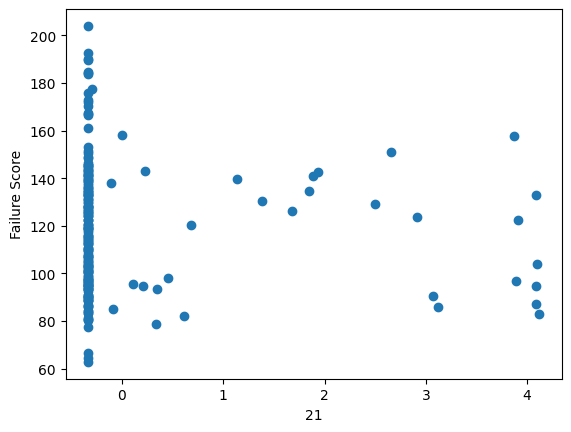

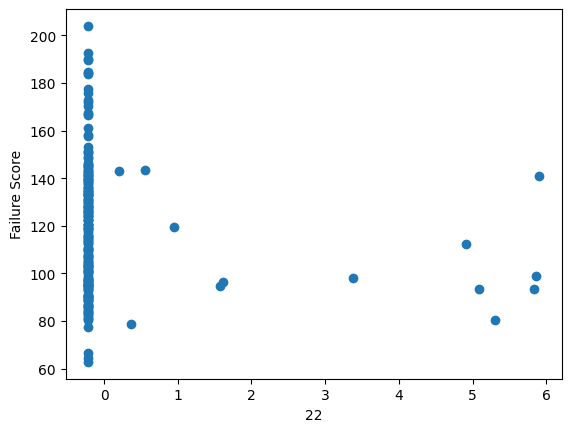

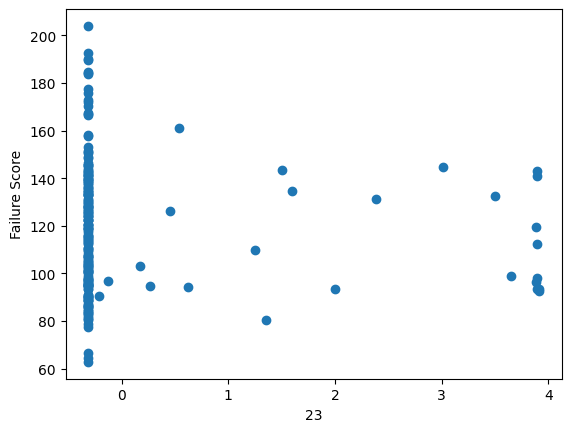

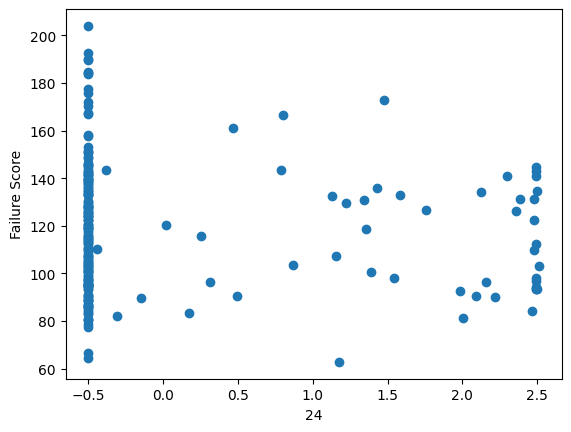

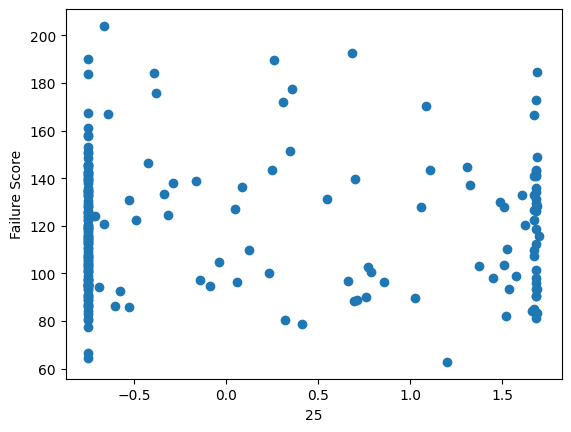

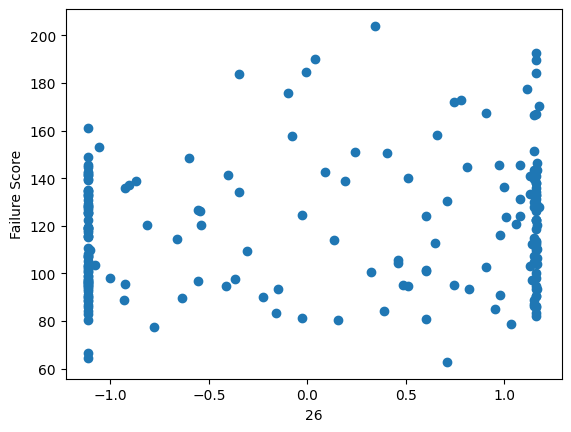

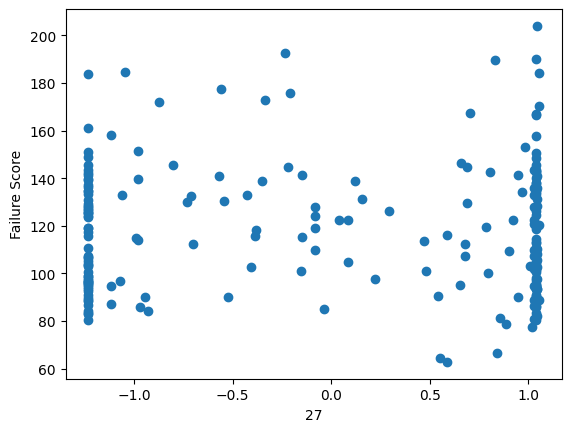

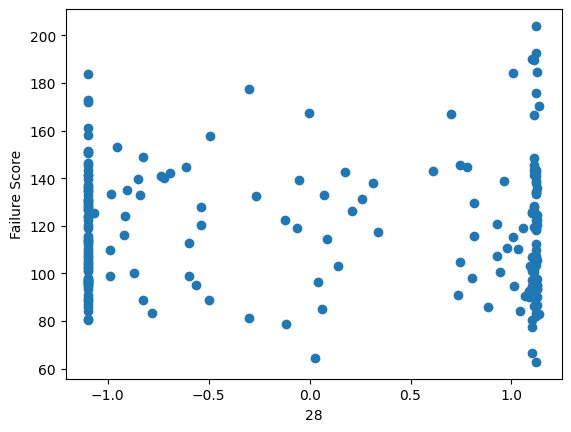

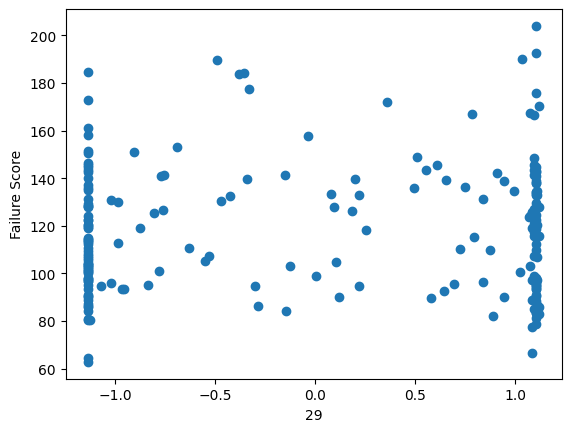

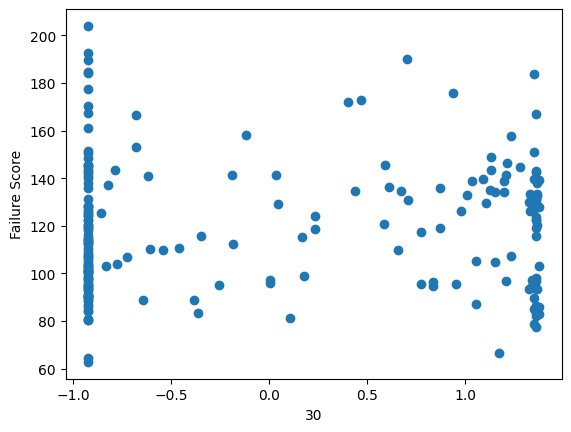

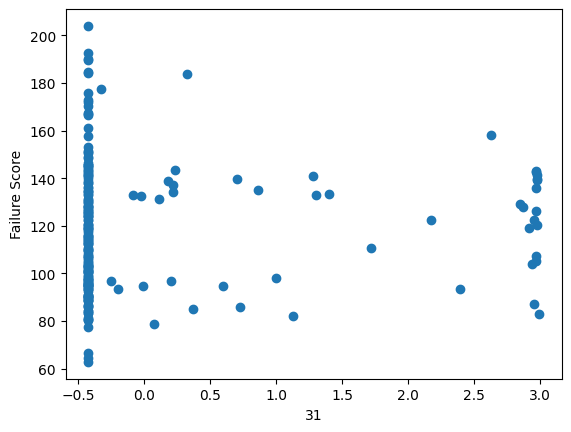

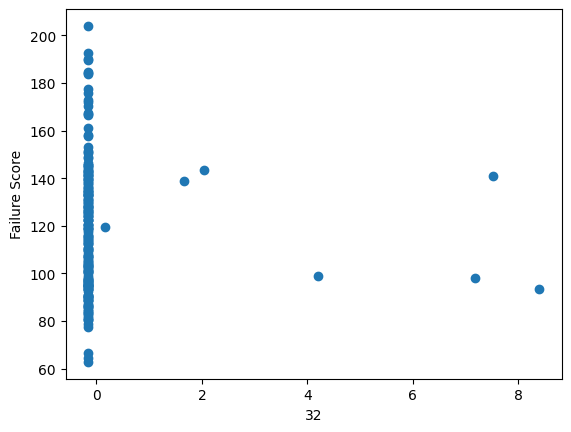

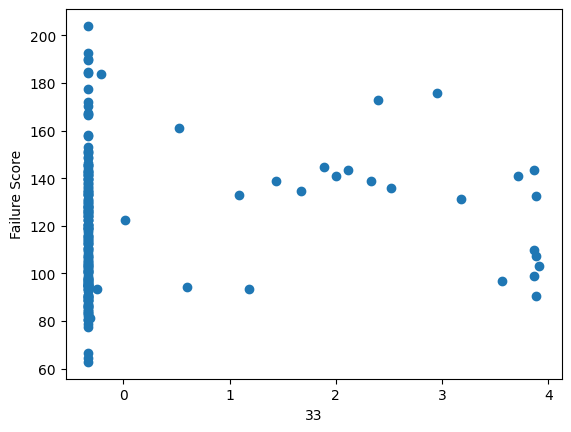

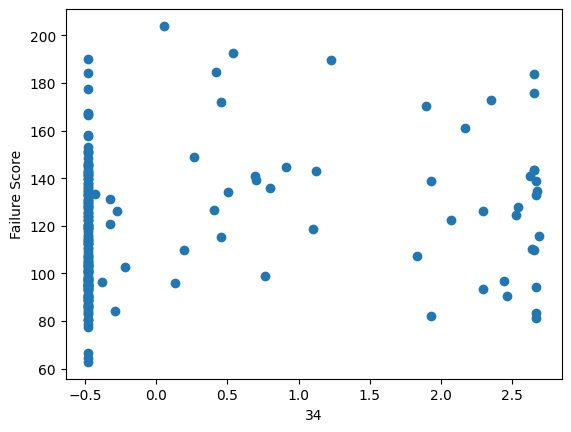

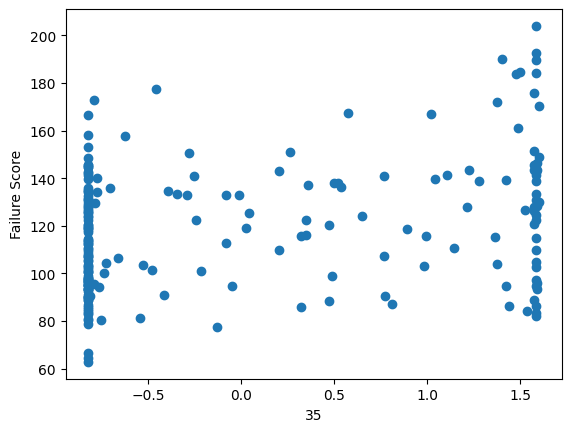

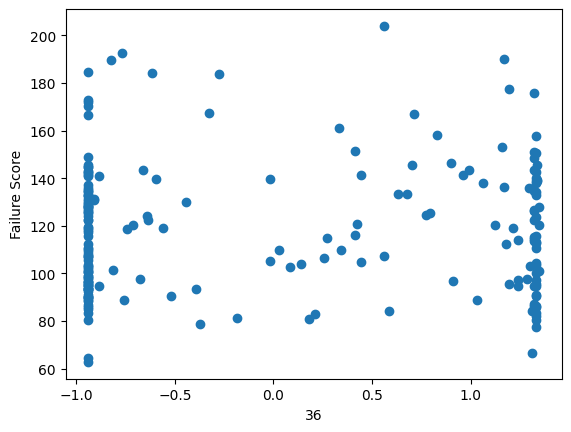

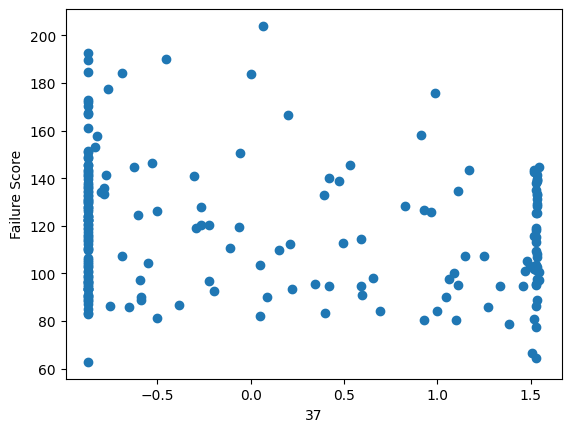

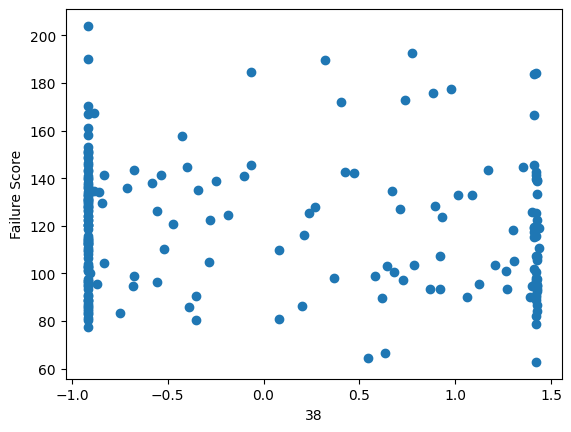

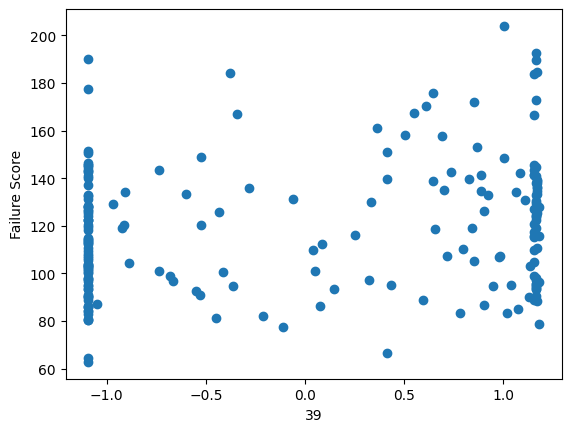

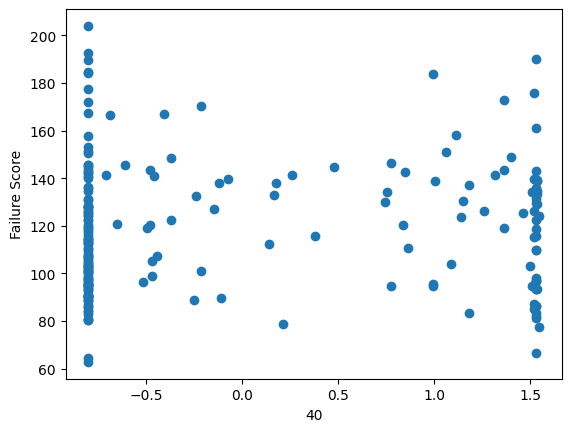

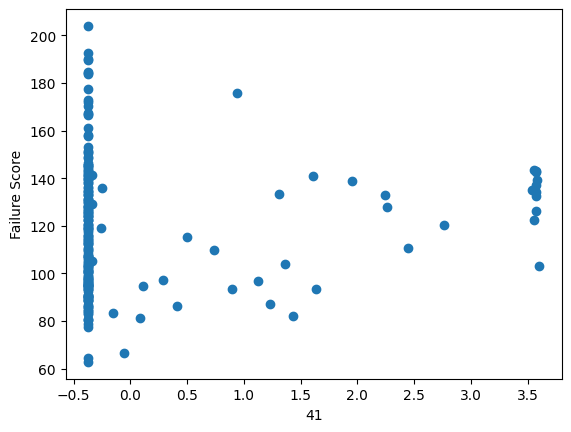

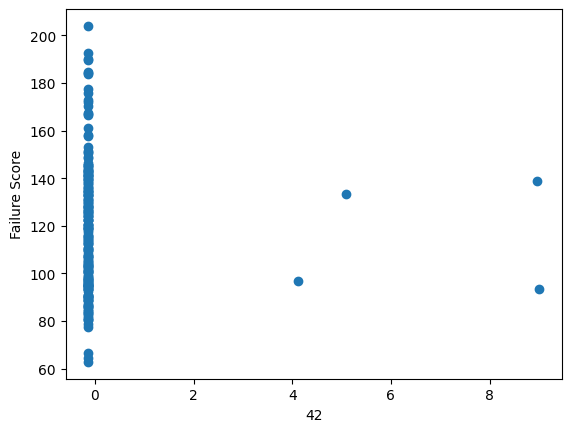

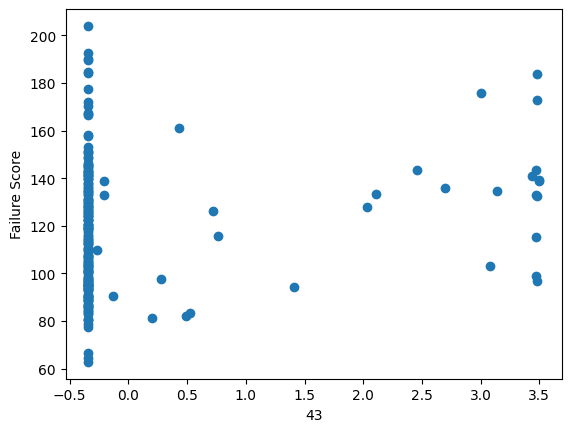

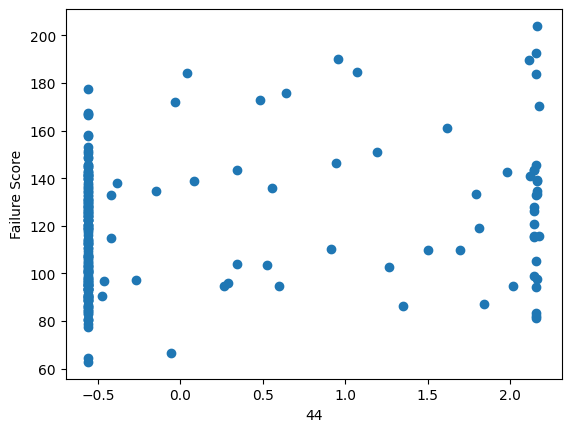

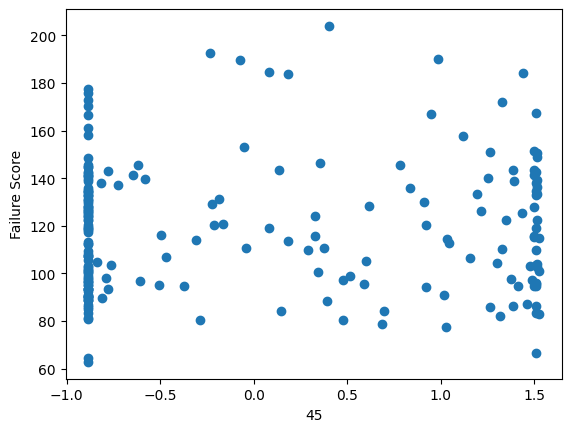

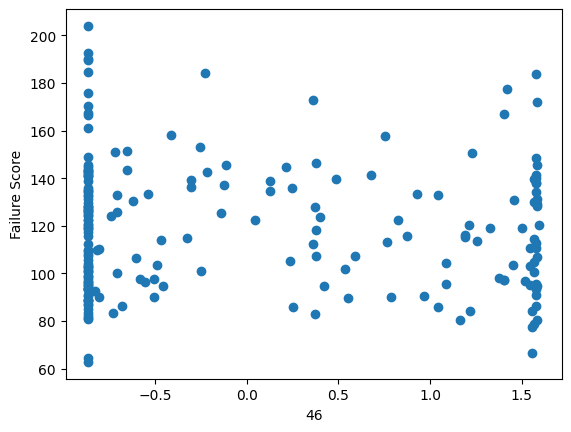

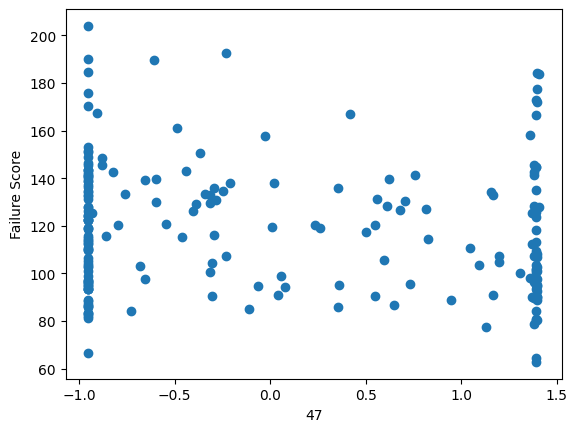

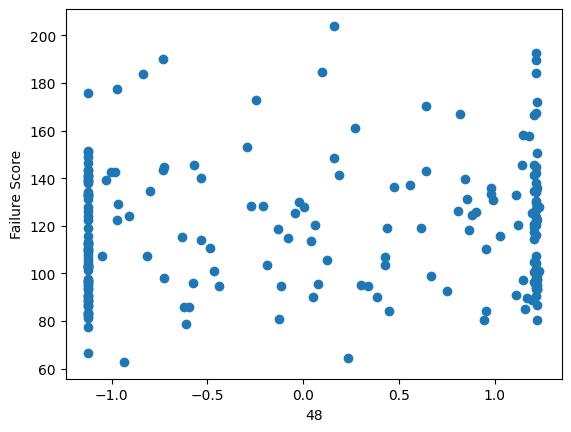

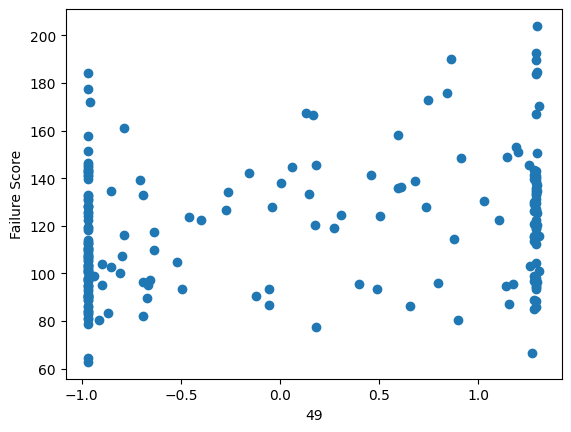

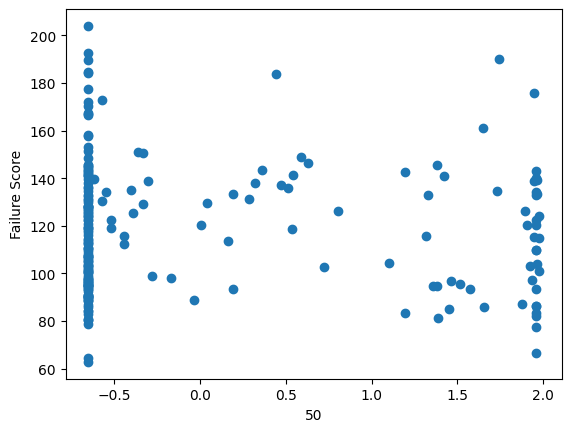

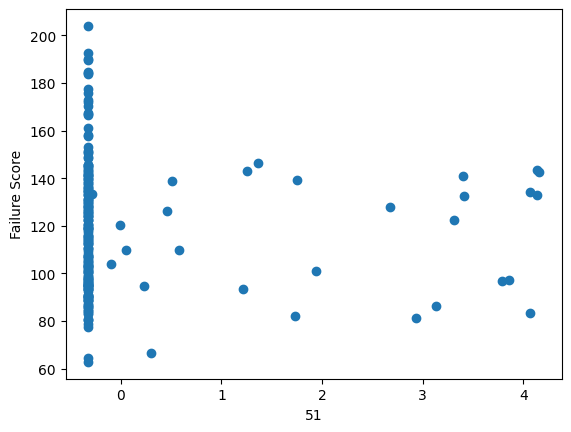

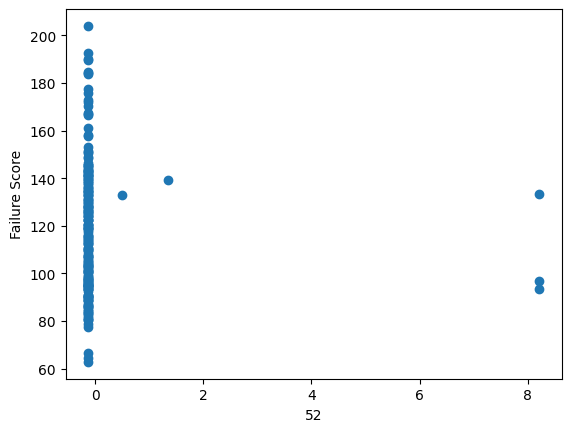

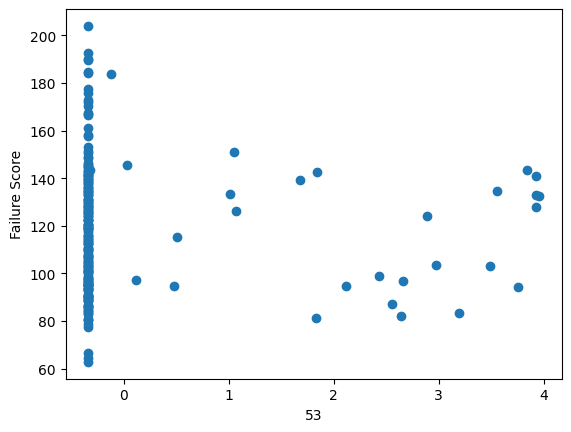

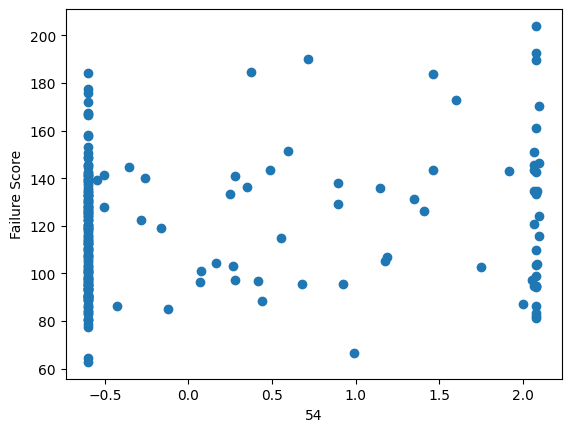

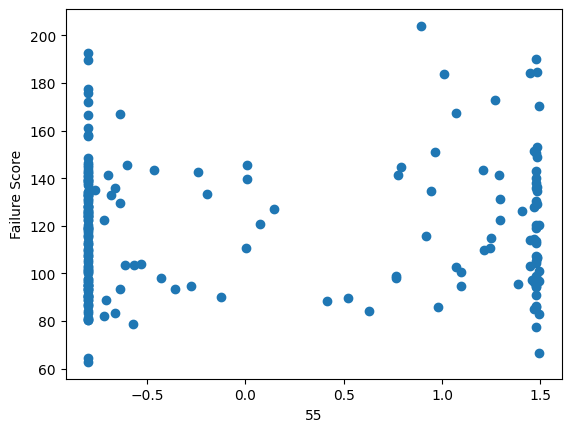

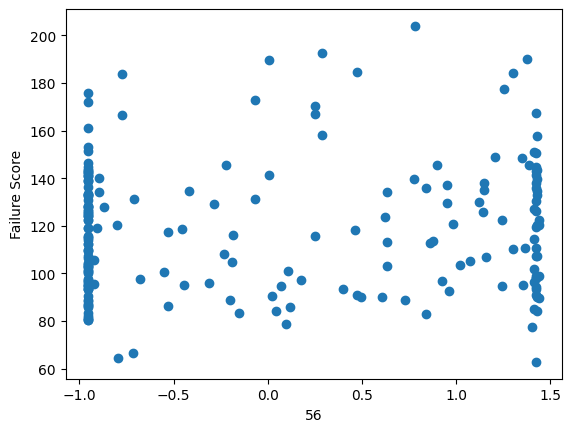

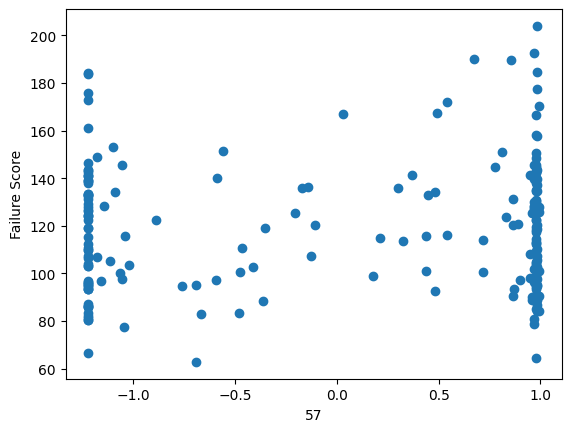

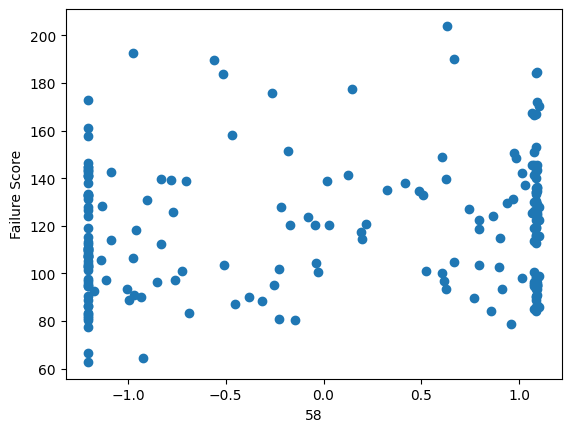

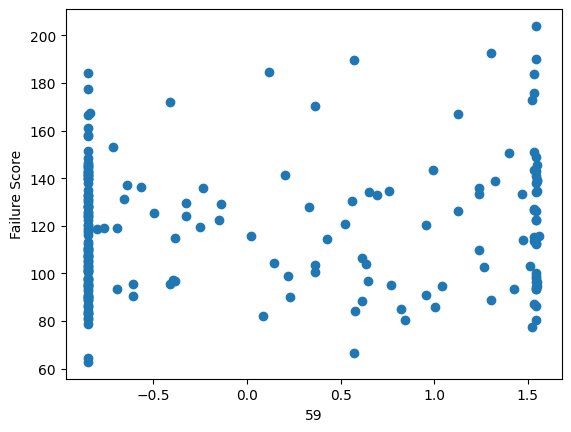

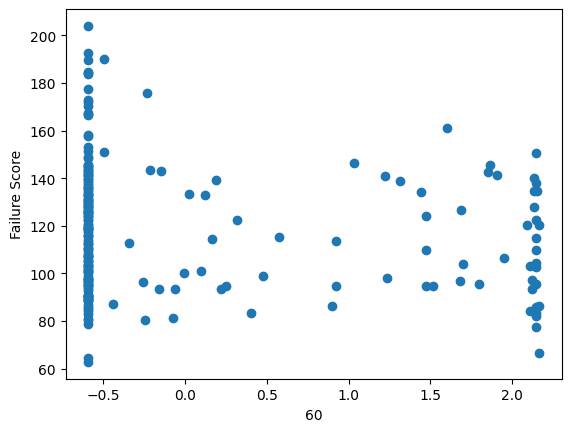

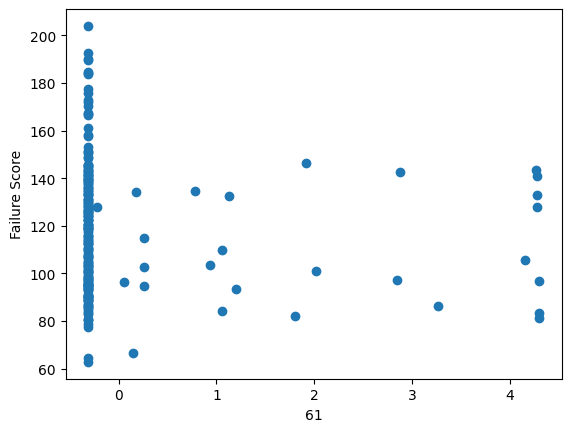

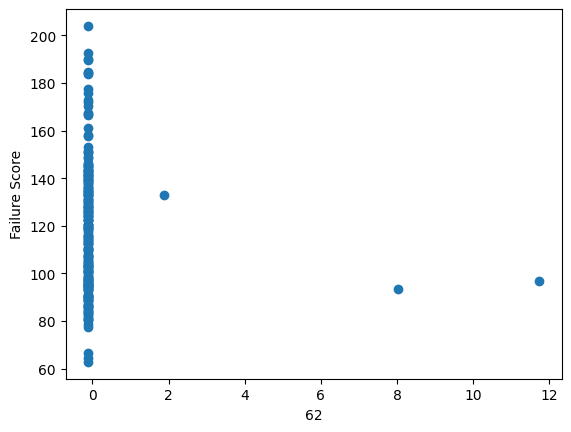

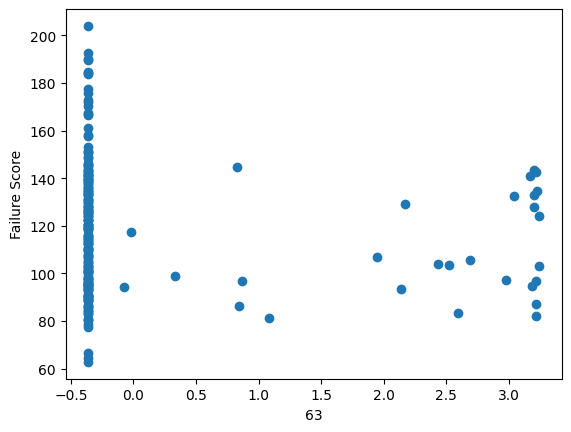

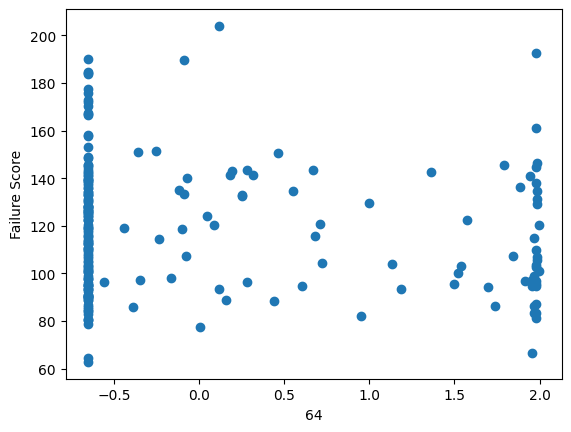

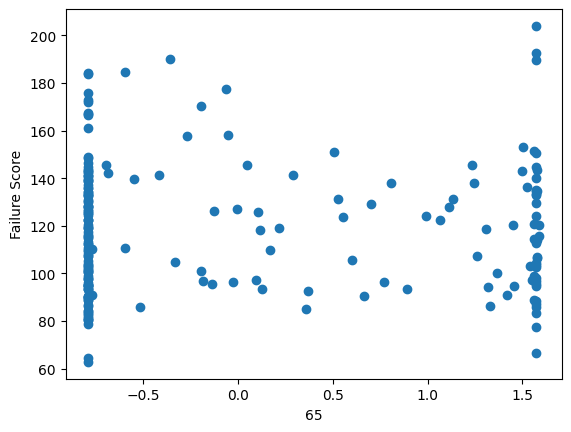

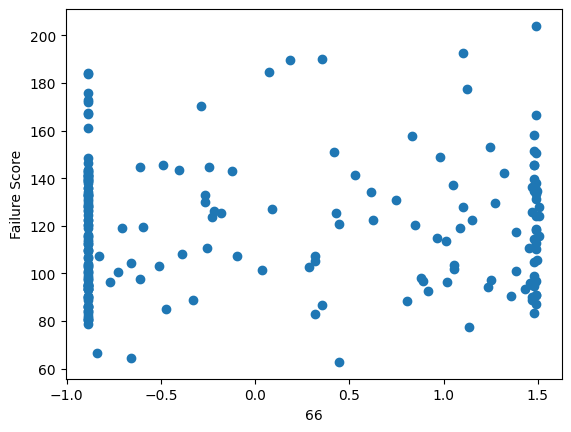

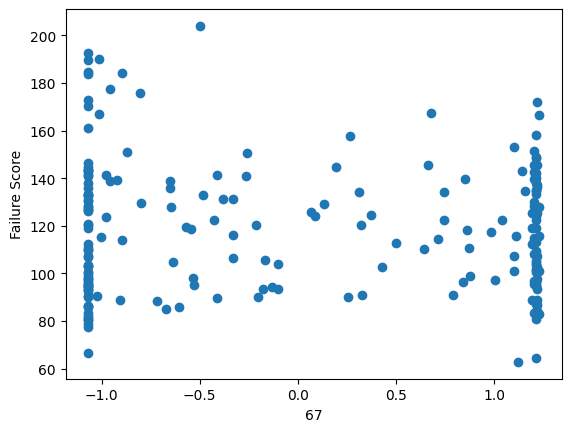

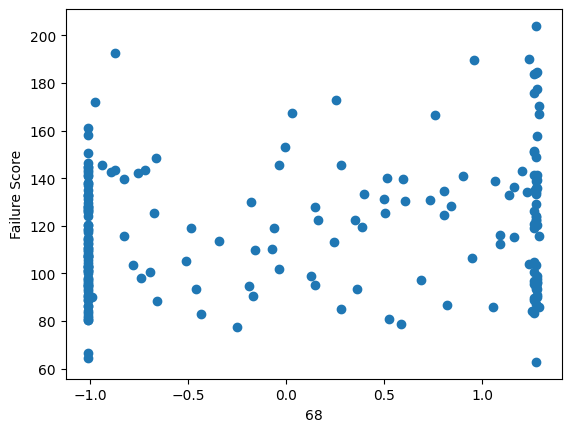

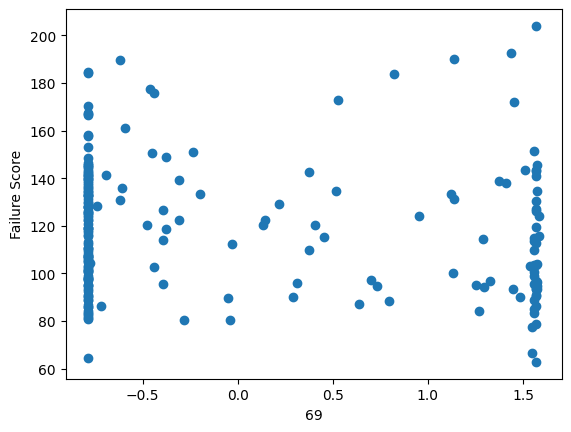

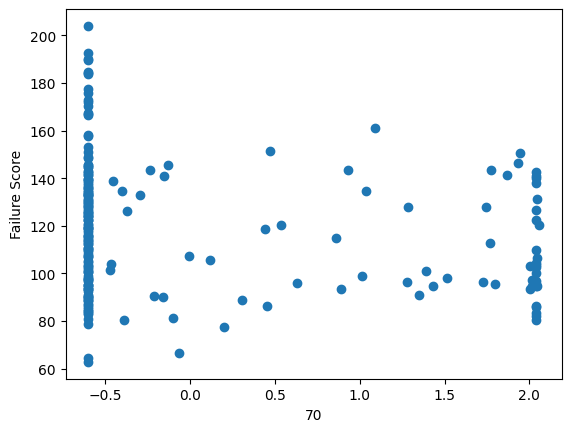

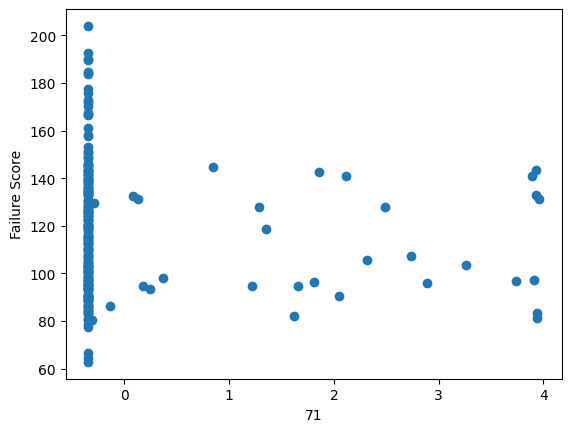

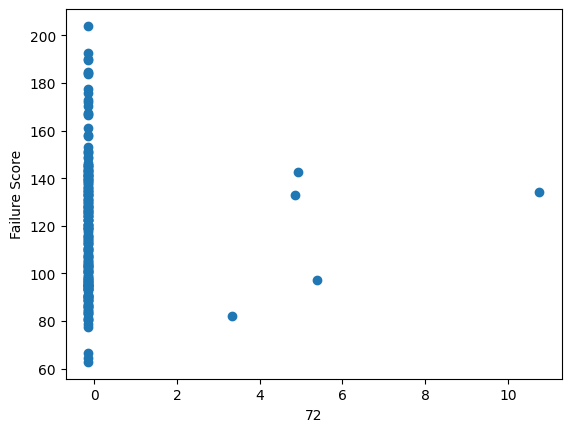

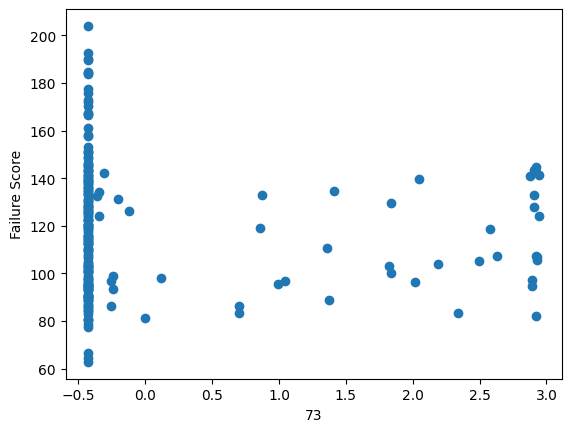

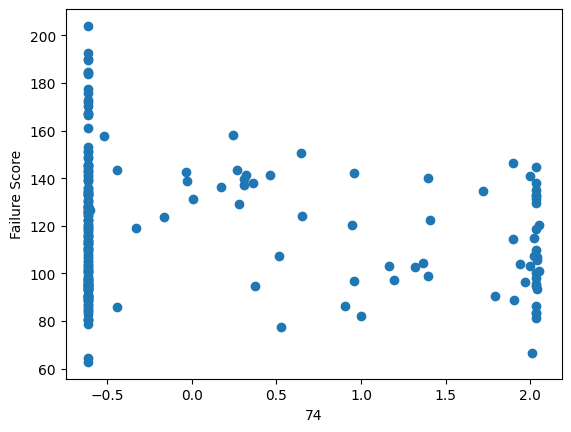

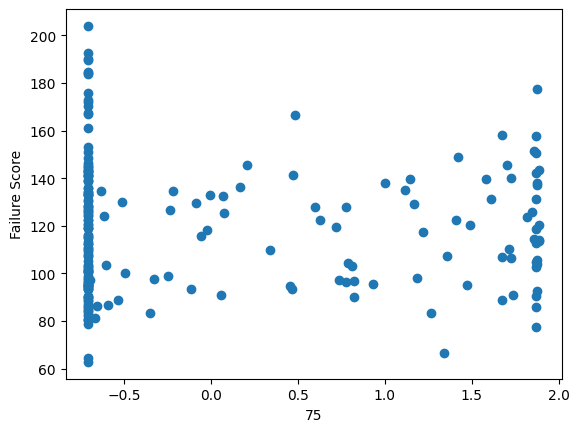

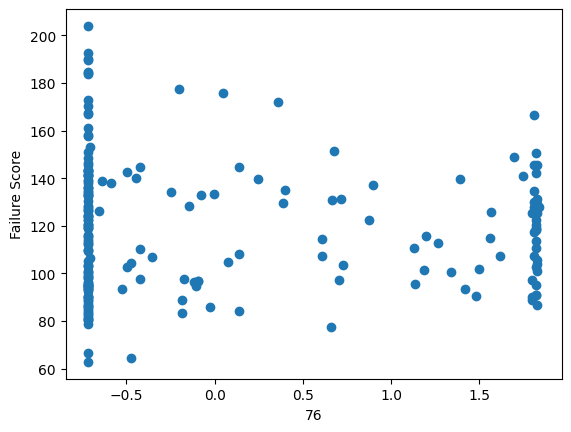

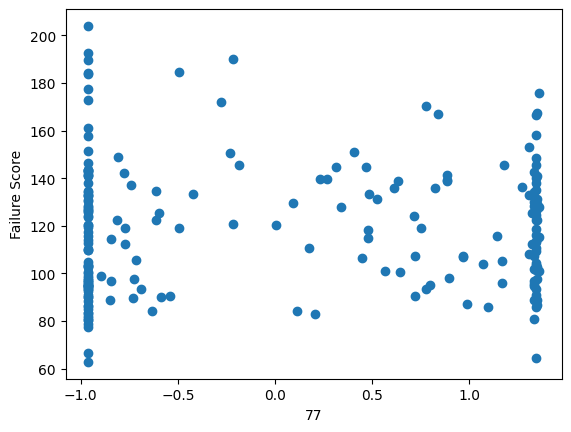

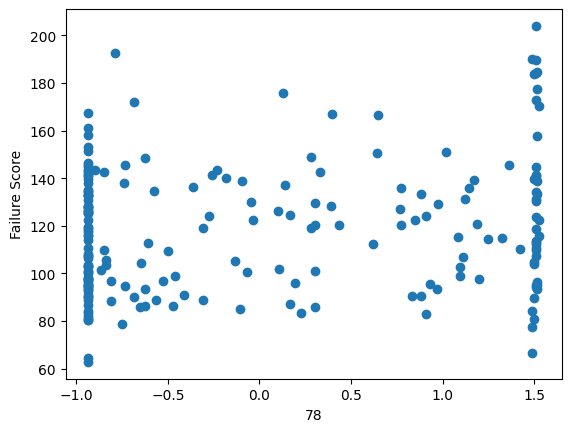

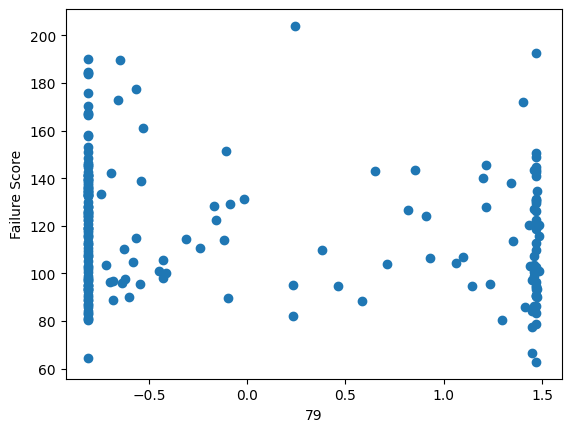

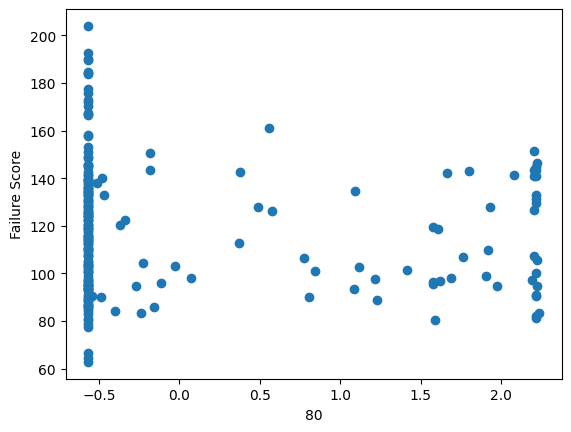

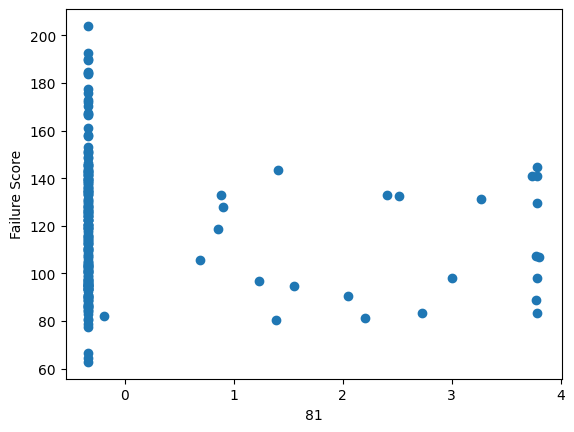

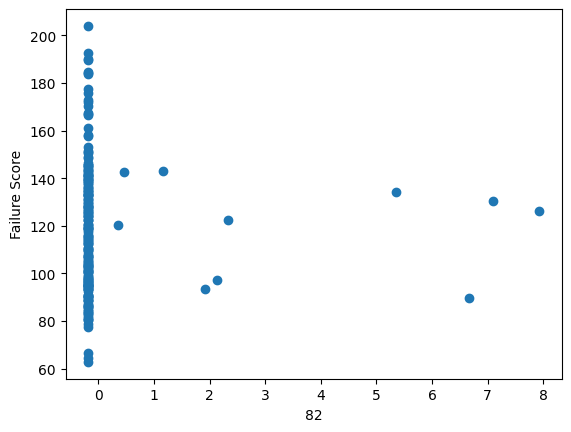

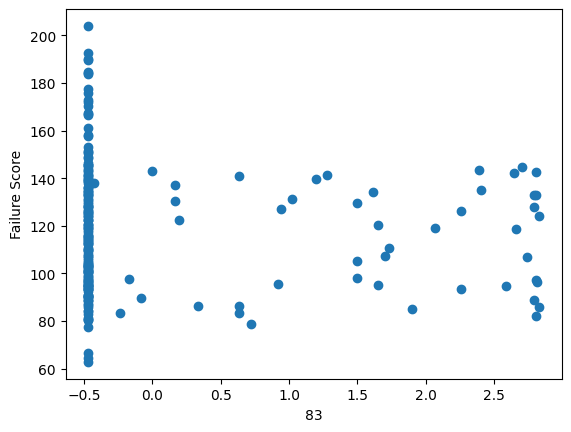

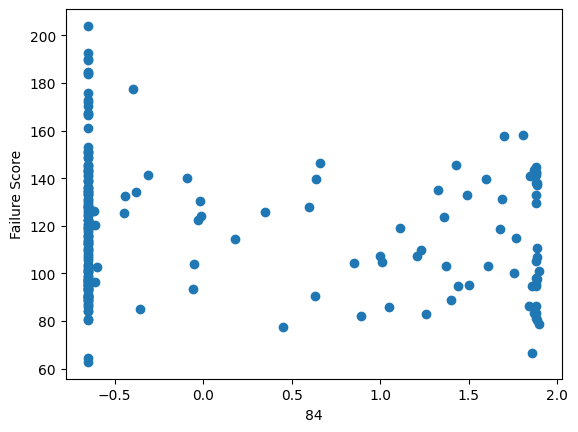

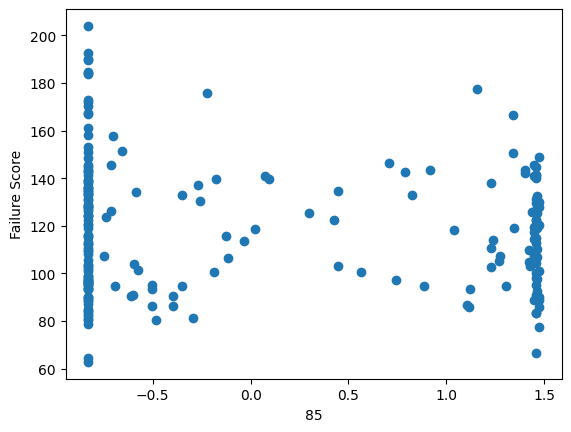

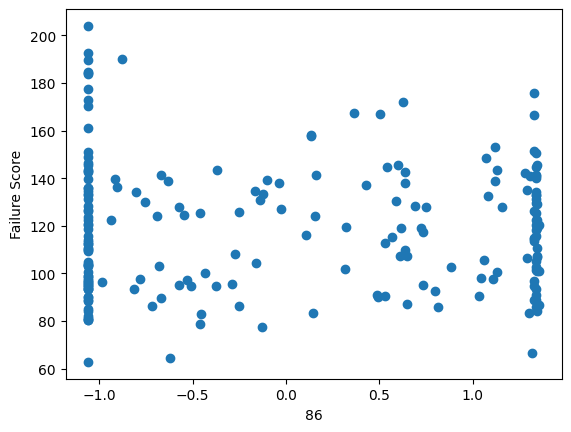

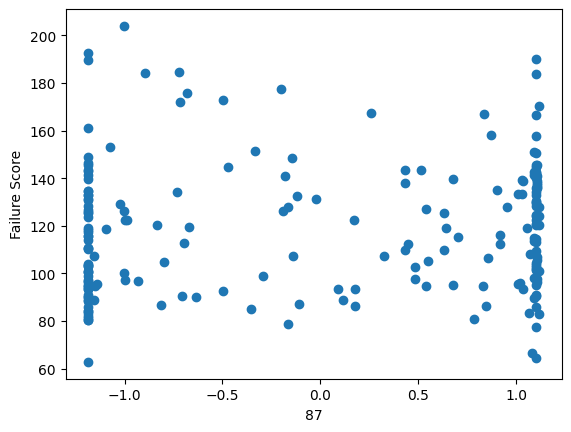

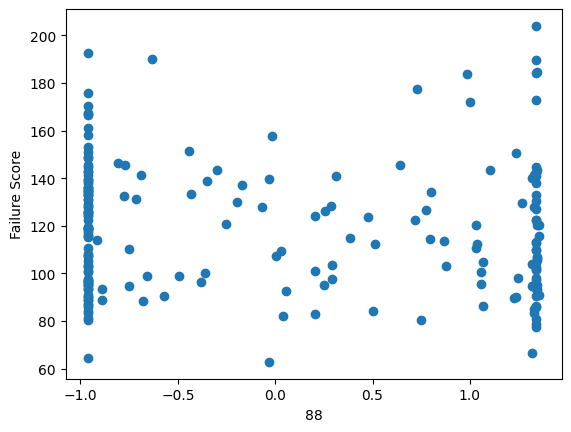

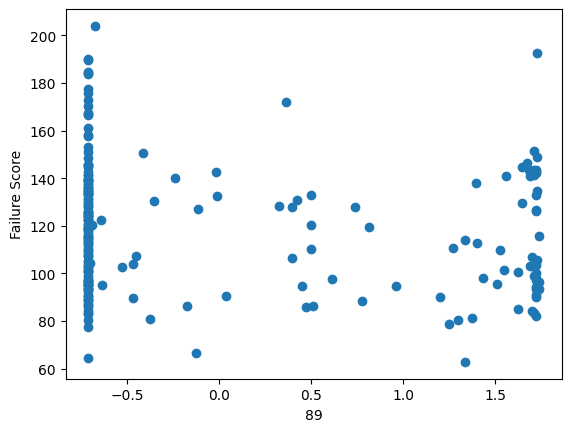

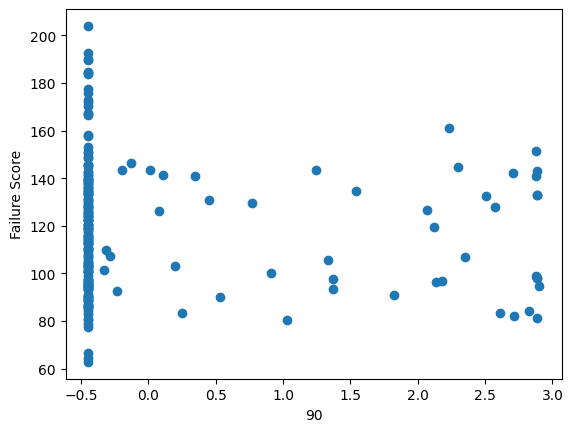

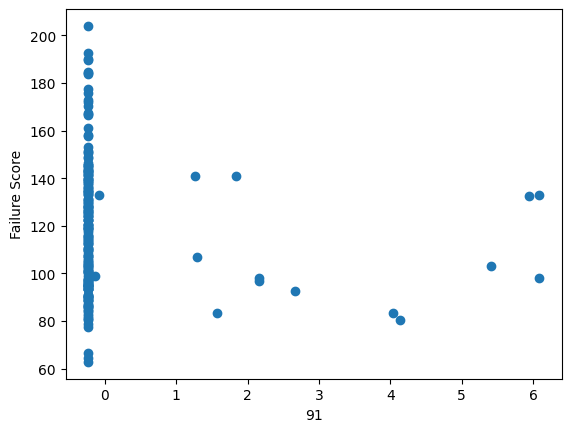

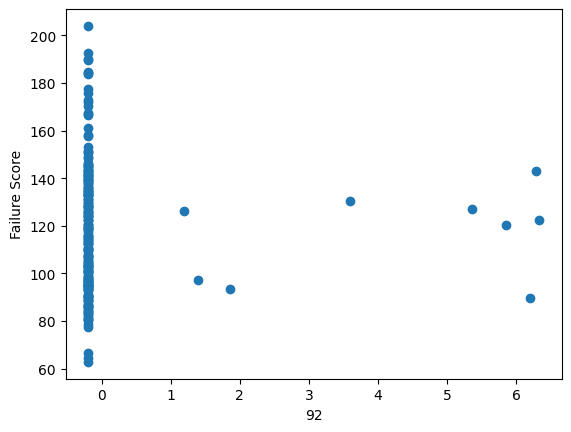

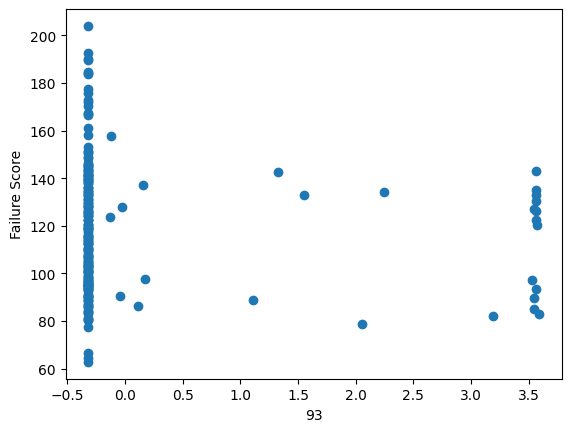

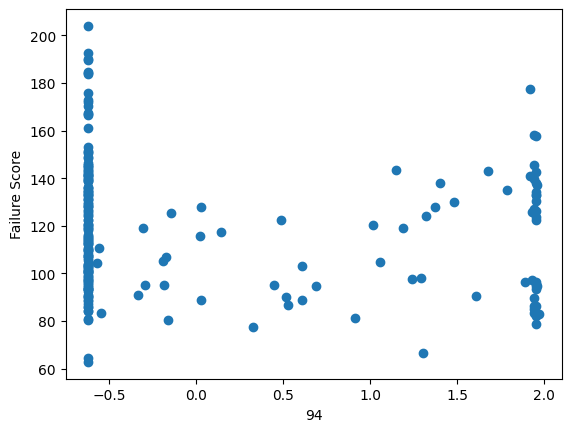

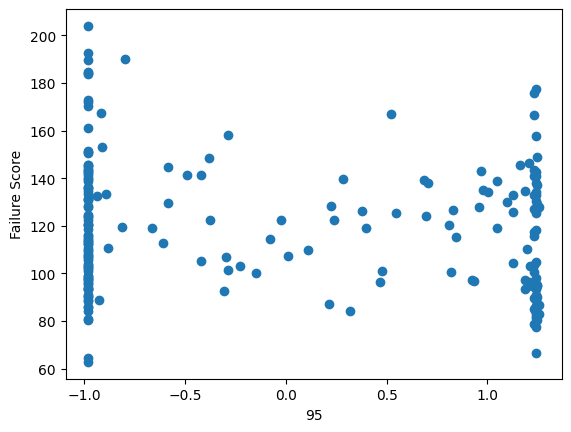

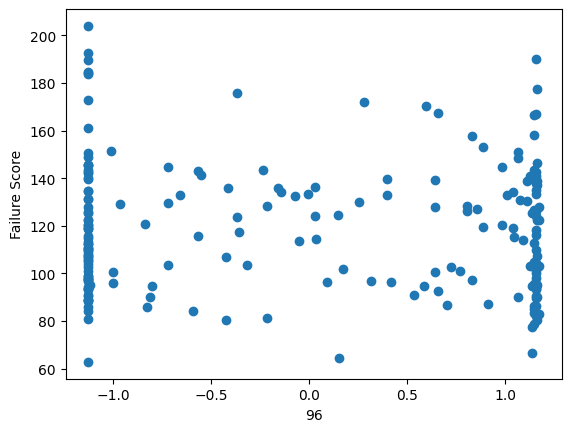

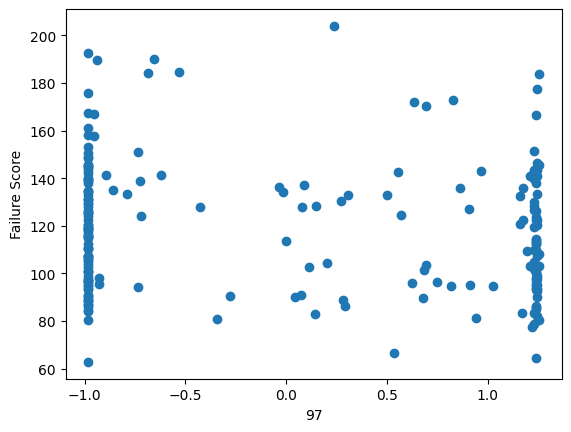

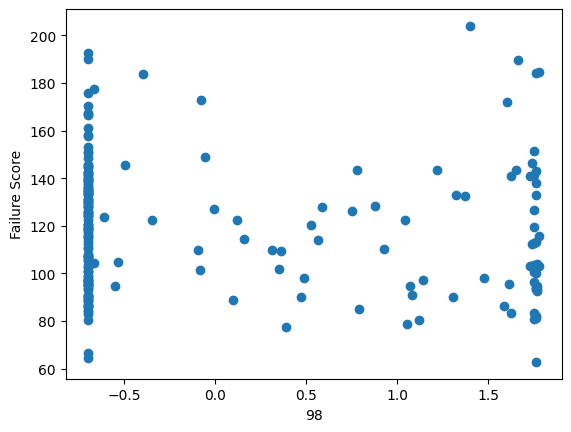

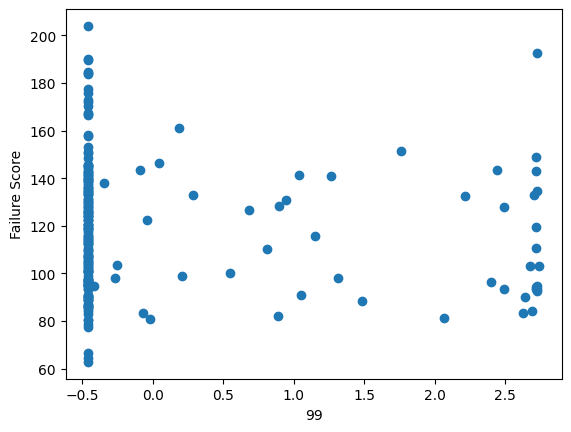

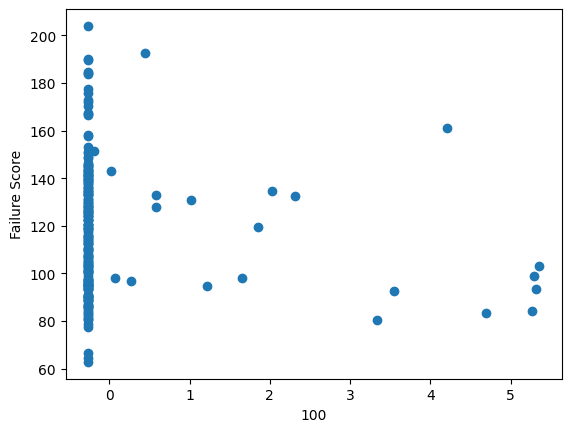

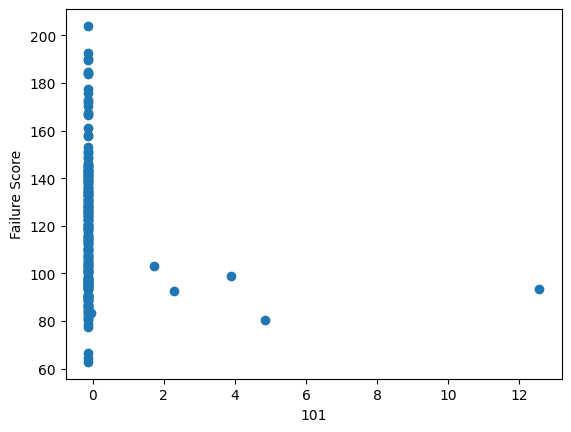

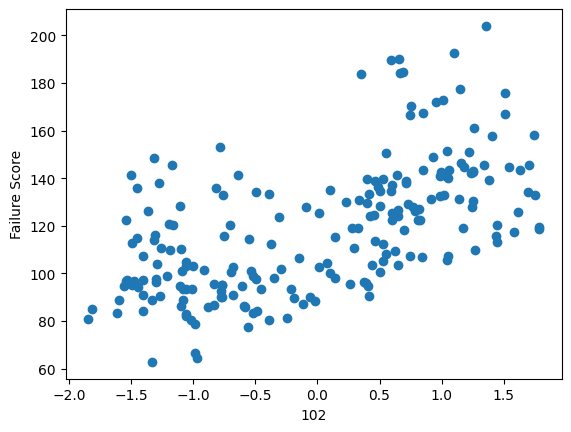

In [105]:
#Printing a Scatter plot to study relationship between sensor and target variable
for col in X.columns:
  plt.scatter(X[col], df_target)
  plt.xlabel(col)
  plt.ylabel('Failure Score')
  plt.show()

In [106]:
#Dropping sensor values 2, 3, 4, 5, 11, 12, 42, 62 
#datavalue since they are not influencing the failure decision as majority of 
#its values are 0 irrespective of the failure score. 

X = X.drop([2,3, 4, 5, 11, 12, 42, 62], axis=1)
print(X.shape)
print(X.head())

(208, 95)
        0         1        6         7         8         9         10   \
0 -0.850166 -0.647100 -0.29704 -0.453927 -0.517864 -0.402243 -0.241349   
1  1.398357  1.004353 -0.29704 -0.453927  1.235674  1.851354 -0.241349   
2 -0.224730 -0.605965 -0.29704 -0.453927 -0.517864 -0.402243 -0.241349   
3 -0.200196 -0.397518 -0.29704 -0.453927 -0.517864 -0.402243 -0.241349   
4 -0.298150  0.201901 -0.29704 -0.453927 -0.517864 -0.402243 -0.241349   

        13        14        15   ...       93        94        95        96   \
0 -0.205845  0.183361  0.579883  ... -0.041943  1.604668  1.239338  1.154730   
1 -0.205845 -0.324033 -0.517047  ...  0.111382  1.939861  1.239338  1.145713   
2 -0.205845 -0.324033 -0.517047  ... -0.317927 -0.619795 -0.980503 -1.126724   
3 -0.205845 -0.324033 -0.517047  ... -0.317927  0.030277  1.239338 -1.126724   
4 -0.205845 -0.324033 -0.517047  ... -0.317927 -0.619795 -0.980503 -1.126724   

        97        98        99        100       101       102  


In [130]:
#splitting the dataset into train and test split
data_train, data_test, target_train, target_test = train_test_split(X, df_target, test_size = 0.2, random_state=100)


print(data_train.shape)
print(data_test.shape)
print(target_train.shape)
print(target_test.shape)

(166, 95)
(42, 95)
(166, 1)
(42, 1)


In [131]:
#Applying LinearRegression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
model_lr = LinearRegression()
model_lr.fit(data_train, target_train)

#Testing the error of the model
preds = model_lr.predict(data_test)
print(mean_absolute_error(target_test, preds))
print(mean_absolute_percentage_error(target_test, preds))

27.7927707897165
0.23166427542991522


In [132]:
#Applying DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
model_dr = DecisionTreeRegressor()
model_dr.fit(data_train, target_train)

#Testing the error of the model
preds = model_dr.predict(data_test)
print(mean_absolute_error(target_test, preds))
print(mean_absolute_percentage_error(target_test, preds))

18.11361423863655
0.150064700360958


In [133]:
#Applying RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model_rr = RandomForestRegressor()
model_rr.fit(data_train, target_train)

#Testing the error of the model
preds = model_rr.predict(data_test)
print(mean_absolute_error(target_test, preds))
print(mean_absolute_percentage_error(target_test, preds))

<ipython-input-133-bf7b5042aca8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rr.fit(data_train, target_train)


14.420158391545943
0.11552548559251638


In [134]:
#Applying Support Vector
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(data_train, target_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [135]:
#Evaluating the Support vector regressor model
preds = regressor.predict(data_test)
print(mean_absolute_error(target_test, preds))
print(mean_absolute_percentage_error(target_test, preds))

21.44256678754768
0.16939323882957652


In [136]:
#Running significance test between Linear Regression and RandomForestRegressor
t, p = paired_ttest_5x2cv(estimator1 = model_lr,
                             estimator2 = model_rr,
                             X = X,
                             y = df_target)

print('t statistic: %.3f', t)
print('p value: %.3f', p)

/usr/local/lib/python3.9/dist-packages/mlxtend/evaluate/ttest.py:306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator2.fit(X_1, y_1)
/usr/local/lib/python3.9/dist-packages/mlxtend/evaluate/ttest.py:306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator2.fit(X_1, y_1)
/usr/local/lib/python3.9/dist-packages/mlxtend/evaluate/ttest.py:306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator2.fit(X_1, y_1)
/usr/local/lib/python3.9/dist-packages/mlxtend/evaluate/ttest.py:306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator2.fit(X_

t statistic: %.3f -1.6734213639575113
p value: %.3f 0.15510131982298317


In [137]:
#Running significance test between LinearRegression and DecisionTreeRegressor
t, p = paired_ttest_5x2cv(estimator1 = model_lr,
                             estimator2 = model_dr,
                             X = X,
                             y = df_target)

print('t statistic: %.3f', t)
print('p value: %.3f', p)

t statistic: %.3f -3.162675603037487
p value: %.3f 0.025019828873061388


In [139]:
#Running significance test between Linear Regression and SVR
t, p = paired_ttest_5x2cv(estimator1 = model_lr,
                             estimator2 = regressor,
                             X = X,
                             y = df_target)

print('t statistic: %.3f', t)
print('p value: %.3f', p)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

t statistic: %.3f -0.10224427522965425
p value: %.3f 0.922536669205869


In [140]:
#Running significance test between RandomForestRegressor and DecisionTreeRegressor
t, p = paired_ttest_5x2cv(estimator1 = model_rr,
                             estimator2 = model_dr,
                             X = X,
                             y = df_target)

print('t statistic: %.3f', t)
print('p value: %.3f', p)

/usr/local/lib/python3.9/dist-packages/mlxtend/evaluate/ttest.py:305: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator1.fit(X_1, y_1)
/usr/local/lib/python3.9/dist-packages/mlxtend/evaluate/ttest.py:305: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator1.fit(X_1, y_1)
/usr/local/lib/python3.9/dist-packages/mlxtend/evaluate/ttest.py:305: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator1.fit(X_1, y_1)
/usr/local/lib/python3.9/dist-packages/mlxtend/evaluate/ttest.py:305: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator1.fit(X_

t statistic: %.3f 1.2564279159630134
p value: %.3f 0.2644657179724569


In [141]:
#Running significance test between SupportVectorRegressor and RandomForestRegressor
t, p = paired_ttest_5x2cv(estimator1 = regressor,
                             estimator2 = model_rr,
                             X = X,
                             y = df_target)

print('t statistic: %.3f', t)
print('p value: %.3f', p)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/mlxtend/evaluate/ttest.py:306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator2.fit(X_1, y_1)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/mlxtend/evaluate/ttest.py:306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

t statistic: %.3f -6.476585712095858
p value: %.3f 0.0013079225739952788


In [142]:
#Running significance test between SupportVectorRegressor and DecisionTreeRegressor
t, p = paired_ttest_5x2cv(estimator1 = regressor,
                             estimator2 = model_dr,
                             X = X,
                             y = df_target)

print('t statistic: %.3f', t)
print('p value: %.3f', p)

t statistic: %.3f -0.5904080887203388
p value: %.3f 0.5805906037193955


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [120]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state = 100, shuffle=True)

In [121]:
abs_errors = []
for train_index, test_index in cv.split(X.to_numpy()):
  d_Train = X.to_numpy()[train_index]
  d_Test = X.to_numpy()[test_index]
  t_Train = df_target.to_numpy()[train_index]
  t_Test = df_target.to_numpy()[test_index]

  m_lr = LinearRegression()
  m_lr.fit(d_Train, t_Train)

  preds = m_lr.predict(d_Test)
  abs_errors.append(mean_absolute_error(t_Test, preds))
print(abs_errors)
sum(abs_errors)/len(abs_errors)

[27.79277078971647, 20.41410165344109, 23.842989335835107, 30.708267450999635, 20.245471409894048]


24.600720127977272

In [122]:
abs_errors = []
for train_index, test_index in cv.split(X.to_numpy()):
  d_Train = X.to_numpy()[train_index]
  d_Test = X.to_numpy()[test_index]
  t_Train = df_target.to_numpy()[train_index]
  t_Test = df_target.to_numpy()[test_index]

  m_dr = DecisionTreeRegressor()
  m_dr.fit(d_Train, t_Train)

  preds = m_dr.predict(d_Test)
  abs_errors.append(mean_absolute_error(t_Test, preds))
print(abs_errors)
sum(abs_errors)/len(abs_errors)

[15.276629235571772, 16.675170076502607, 21.067306872791466, 18.858088894087164, 19.23338853376977]


18.222116722544556

In [123]:
abs_errors = []
for train_index, test_index in cv.split(X.to_numpy()):
  d_Train = X.to_numpy()[train_index]
  d_Test = X.to_numpy()[test_index]
  t_Train = df_target.to_numpy()[train_index]
  t_Test = df_target.to_numpy()[test_index]

  m_svr = SVR(kernel = 'rbf')
  m_svr.fit(d_Train, t_Train)

  preds = m_svr.predict(d_Test)
  abs_errors.append(mean_absolute_error(t_Test, preds))
print(abs_errors)
sum(abs_errors)/len(abs_errors)

[21.44256678754768, 25.706153480549876, 24.262948525084035, 18.509729945066095, 18.346992329776107]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

21.653678213604756

In [124]:
abs_errors = []
for train_index, test_index in cv.split(X.to_numpy()):
  d_Train = X.to_numpy()[train_index]
  d_Test = X.to_numpy()[test_index]
  t_Train = df_target.to_numpy()[train_index]
  t_Test = df_target.to_numpy()[test_index]

  m_rr = RandomForestRegressor()
  m_rr.fit(d_Train, t_Train)

  preds = m_rr.predict(d_Test)
  abs_errors.append(mean_absolute_error(t_Test, preds))
print(abs_errors)
sum(abs_errors)/len(abs_errors)

<ipython-input-124-792bd6c304ff>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m_rr.fit(d_Train, t_Train)
<ipython-input-124-792bd6c304ff>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m_rr.fit(d_Train, t_Train)
<ipython-input-124-792bd6c304ff>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m_rr.fit(d_Train, t_Train)
<ipython-input-124-792bd6c304ff>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m_rr.fit(d_Train, t_Train)
<ipython-input-124-792bd6c304ff>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

[13.40564701141455, 15.220602189377603, 15.234182758956292, 13.260992791623623, 11.607178999931847]


13.745720750260784

In [125]:
df_sensor_test = np.load('xTest.npy')
df_sensor_test = pd.DataFrame(df_sensor_test)

In [126]:
scaler = StandardScaler()
X_Test = scaler.fit_transform(df_sensor_test)
X_Test = pd.DataFrame(X_Test)

In [127]:
X_Test = X_Test.drop([2,3, 4, 5, 11, 12, 42, 62], axis=1)

In [128]:
preds = model_rr.predict(X_Test)
preds

array([103.01920362,  94.36951079,  98.97711958, 102.77582829,
        99.20855092, 111.39477203, 107.38436734,  98.80495195,
       110.84729454, 111.32294759, 104.56941992, 103.00158014,
       111.54771451, 104.1735202 ,  98.36678781, 119.13767915,
       117.74437893, 106.76160215, 100.83785084, 123.71371937,
       123.21776692, 117.13335111, 124.21971332, 110.19532056,
       108.62677884, 116.69009016, 100.29887362, 100.18649492,
       137.63343203, 150.27154664, 138.56804315, 133.81551998,
       108.7753594 , 114.75907161, 105.27161882, 142.18762847,
       139.49130488, 142.56684742, 133.57591271, 138.27361388,
       109.47575229,  97.78743838, 108.04031417, 105.48458352,
       131.60580901, 140.70002955, 131.66473448, 137.99564999,
       143.67479647, 143.86967505, 135.6642068 , 133.5223275 ])

In [129]:
np.save('yPred',preds)